# Car Price Prediction


### Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns', None) # display all columns
cars.head() # display the first 5 rows of the dataframe

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [3]:
cars.describe() # summary statistics of the numerical columns

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

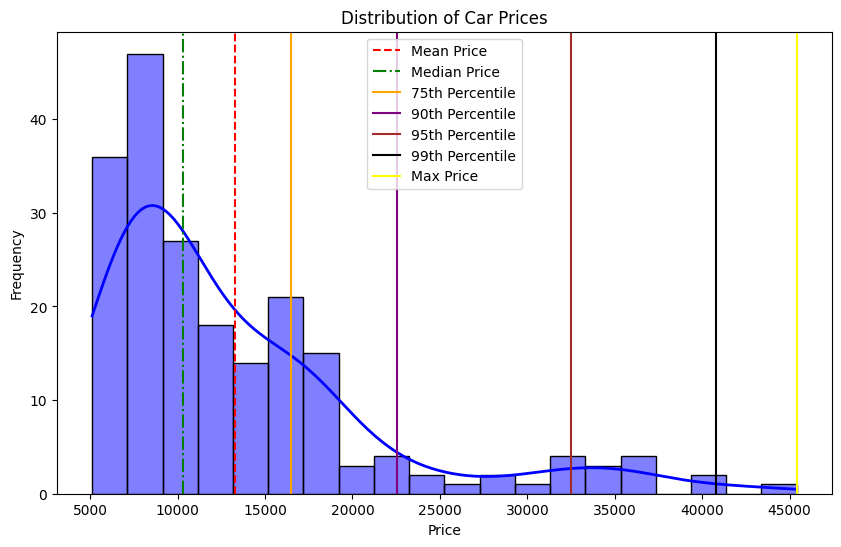

In [4]:
# Lets plot the distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(cars['price'], kde=True, color='blue', bins=20, line_kws={'linewidth': 2})
plt.axvline(cars['price'].mean(), color='red', linestyle='--', label='Mean Price')
plt.axvline(cars['price'].median(), color='green', linestyle='-.', label='Median Price')
plt.axvline(cars['price'].quantile(0.75), color='orange', linestyle='-', label='75th Percentile')
plt.axvline(cars['price'].quantile(0.90), color='purple', linestyle='-', label='90th Percentile')
plt.axvline(cars['price'].quantile(0.95), color='brown', linestyle='-', label='95th Percentile')
plt.axvline(cars['price'].quantile(0.99), color='black', linestyle='-', label='99th Percentile')
plt.axvline(cars['price'].max(), color='yellow', linestyle='-', label='Max Price')
plt.legend()
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Insight from the above plot:
# The distribution of car prices is right-skewed, with a few cars having high prices.

In [6]:
cars.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars.head() # display the first 5 rows of the dataframe

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [8]:
cars.CarName.value_counts() # count of unique car names

CarName
peugeot 504                 6
toyota corolla              6
toyota corona               6
subaru dl                   4
mitsubishi outlander        3
                           ..
volkswagen super beetle     1
volkswagen rabbit custom    1
volvo 245                   1
volvo diesel                1
volvo 246                   1
Name: count, Length: 147, dtype: int64

In [9]:
print("alfa-romero giulia".split(" "))
print("alfa-romero giulia".split(" ")[0])
print("audi 100 ls".split(" ")[0])
print("maxda glc deluxe".split(" ")[0])

['alfa-romero', 'giulia']
alfa-romero
audi
maxda


In [10]:
# Data Cleaning and Preparation
# Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x: x.split(" ")[0])
CompanyName

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [11]:
cars.head() # display the first 5 rows of the dataframe

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [12]:
cars.insert(3, 'CompanyName', CompanyName) # insert the 'CompanyName' column at index 3
cars.head() # display the first 5 rows of the dataframe

car_ID  symboling                   CarName  CompanyName fueltype  \
0       1          3        alfa-romero giulia  alfa-romero      gas   
1       2          3       alfa-romero stelvio  alfa-romero      gas   
2       3          1  alfa-romero Quadrifoglio  alfa-romero      gas   
3       4          2               audi 100 ls         audi      gas   
4       5          2                audi 100ls         audi      gas   

  aspiration doornumber      carbody drivewheel enginelocation  wheelbase  \
0        std        two  convertible        rwd          front       88.6   
1        std        two  convertible        rwd          front       88.6   
2        std        two    hatchback        rwd          front       94.5   
3        std       four        sedan        fwd          front       99.8   
4        std       four        sedan        4wd          front       99.4   

   carlength  carwidth  carheight  curbweight enginetype cylindernumber  \
0      168.8      64.1       48.8        2548       dohc           four   
1      168.8      64.1       48.8        2548       dohc           four   
2      171.2      65.5       52.4        2823       ohcv            six   
3      176.6      66.2       54.3        2337        ohc           four   
4      176.6      66.4       54.3        2824        ohc           five   

   enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  \
0         130       mpfi       3.47    2.68               9.0         111   
1         130       mpfi       3.47    2.68               9.0         111   
2         152       mpfi       2.68    3.47               9.0         154   
3         109       mpfi       3.19    3.40              10.0         102   
4         136       mpfi       3.19    3.40               8.0         115   

   peakrpm  citympg  highwaympg    price  
0     5000       21          27  13495.0  
1     5000       21          27  16500.0  
2     5000       19          26  16500.0  
3     5500       24          30  13950.0  
4     5500       18          22  17450.0

In [13]:
cars.drop(['CarName'], axis=1, inplace=True) # drop the 'CarName' column
cars.head() # display the first 5 rows of the dataframe

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [14]:
cars.CompanyName.value_counts() # count of unique car companies

CompanyName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
porcshce        1
Nissan          1
toyouta         1
vokswagen       1
Name: count, dtype: int64

In [15]:
len(cars.CompanyName.unique()) # number of unique car companies

28

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [16]:
cars.CompanyName = cars.CompanyName.str.lower() # convert the 'CompanyName' column to lowercase
cars.CompanyName.unique() # unique car companies

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
len(cars.CompanyName.unique()) # number of unique car companies

27

In [18]:
def replace_name(old_name, new_name):
    cars.CompanyName.replace(old_name, new_name, inplace=True)

replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

cars.CompanyName.unique() # unique car companies

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
len(cars.CompanyName.unique()) # number of unique car companies

22

In [20]:
cars.CompanyName.value_counts() # count of unique car companies

CompanyName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: count, dtype: int64

In [21]:
# Check for duplicates
cars.duplicated().sum() # number of duplicate rows

np.int64(0)

# Visualizing the data

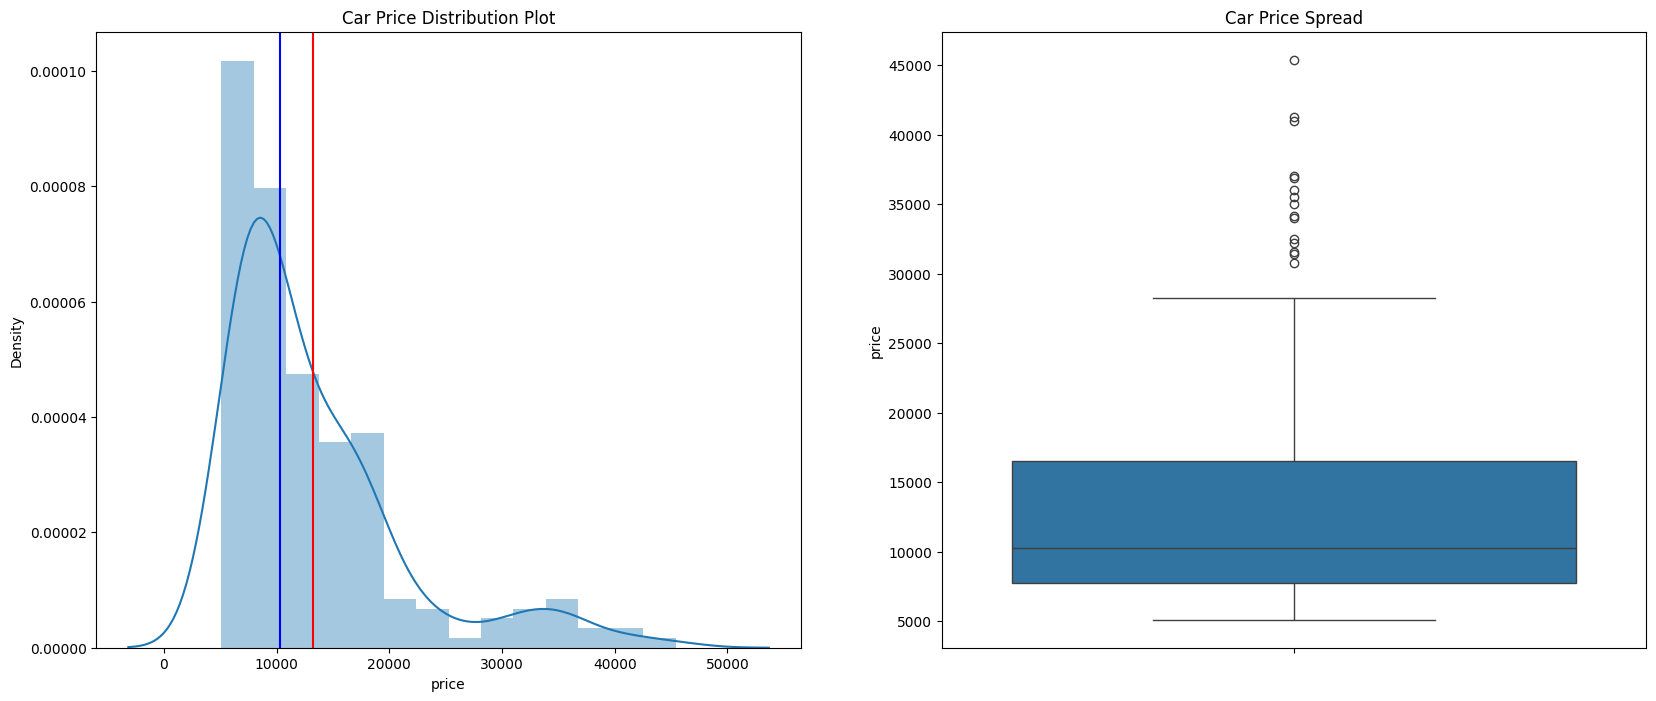

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)
plt.axvline(cars.price.mean(), color="r")
plt.axvline(cars.price.median(), color="b")

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#### Step 3.1 : Visualising Categorical Data

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

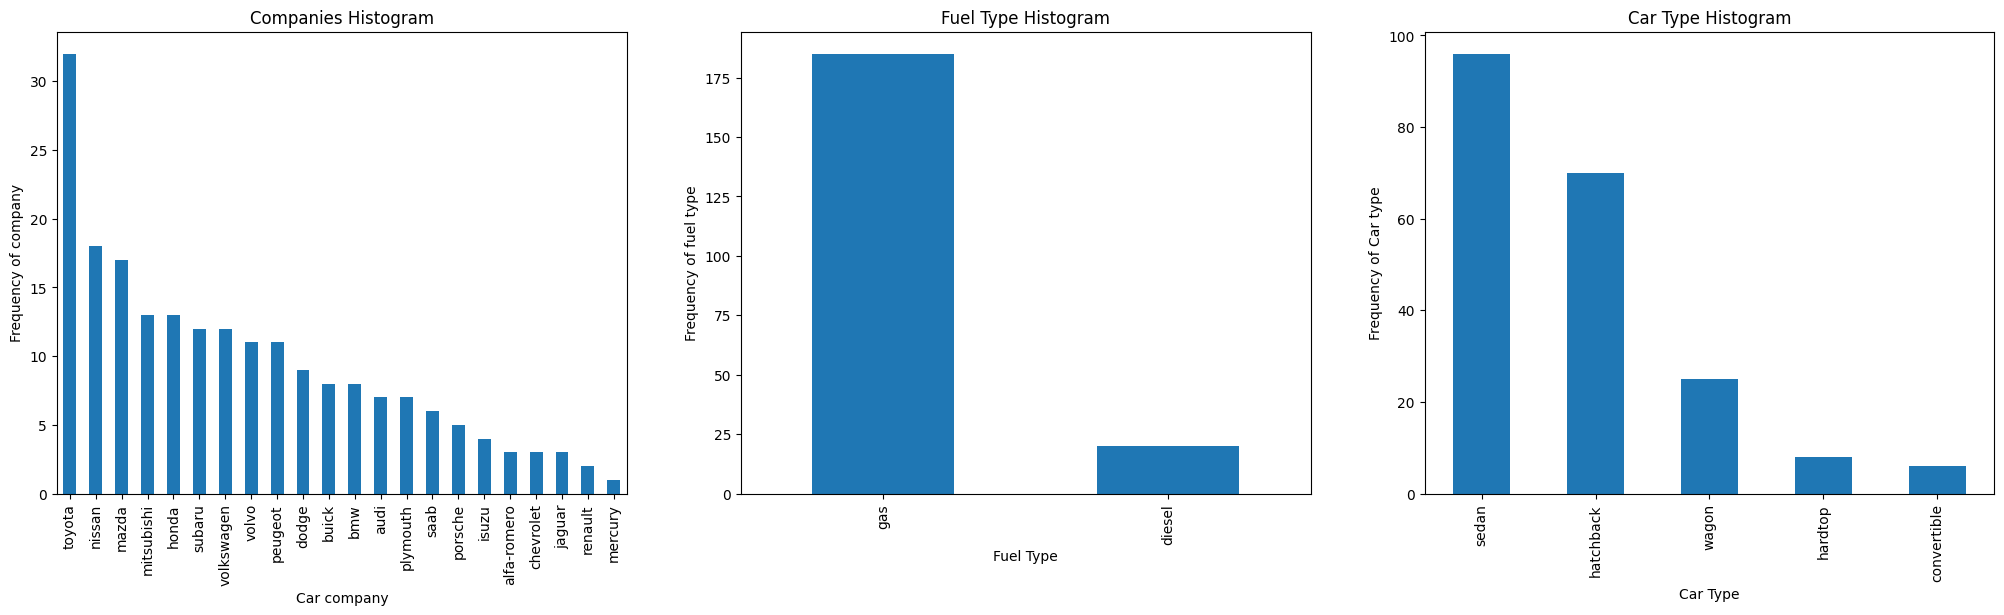

In [23]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### Inference :

1. `Toyota` seemed to be favored car company.
2. Number of `gas` fueled cars are more than `diesel`.
3. `sedan` is the top car type prefered.

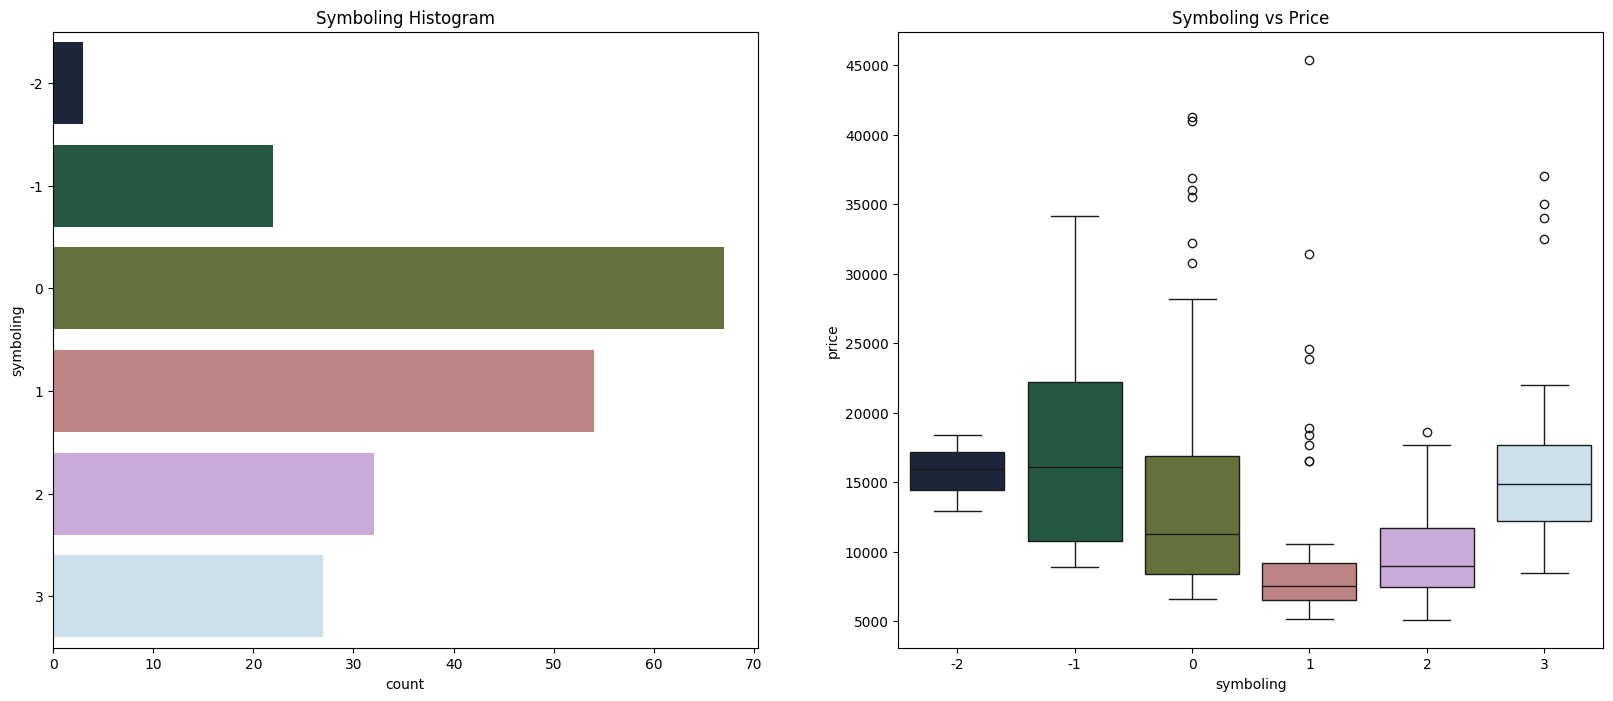

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling.astype('category'), palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

#### Inference :

1. It seems that the symboling with `0` and `1` values have high number of rows (i.e. They are most sold.)
2. The cars with `-1` symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with `3` value has the price range similar to `-2` value. There is a dip in price at symboling `1`.

In [25]:
cars['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

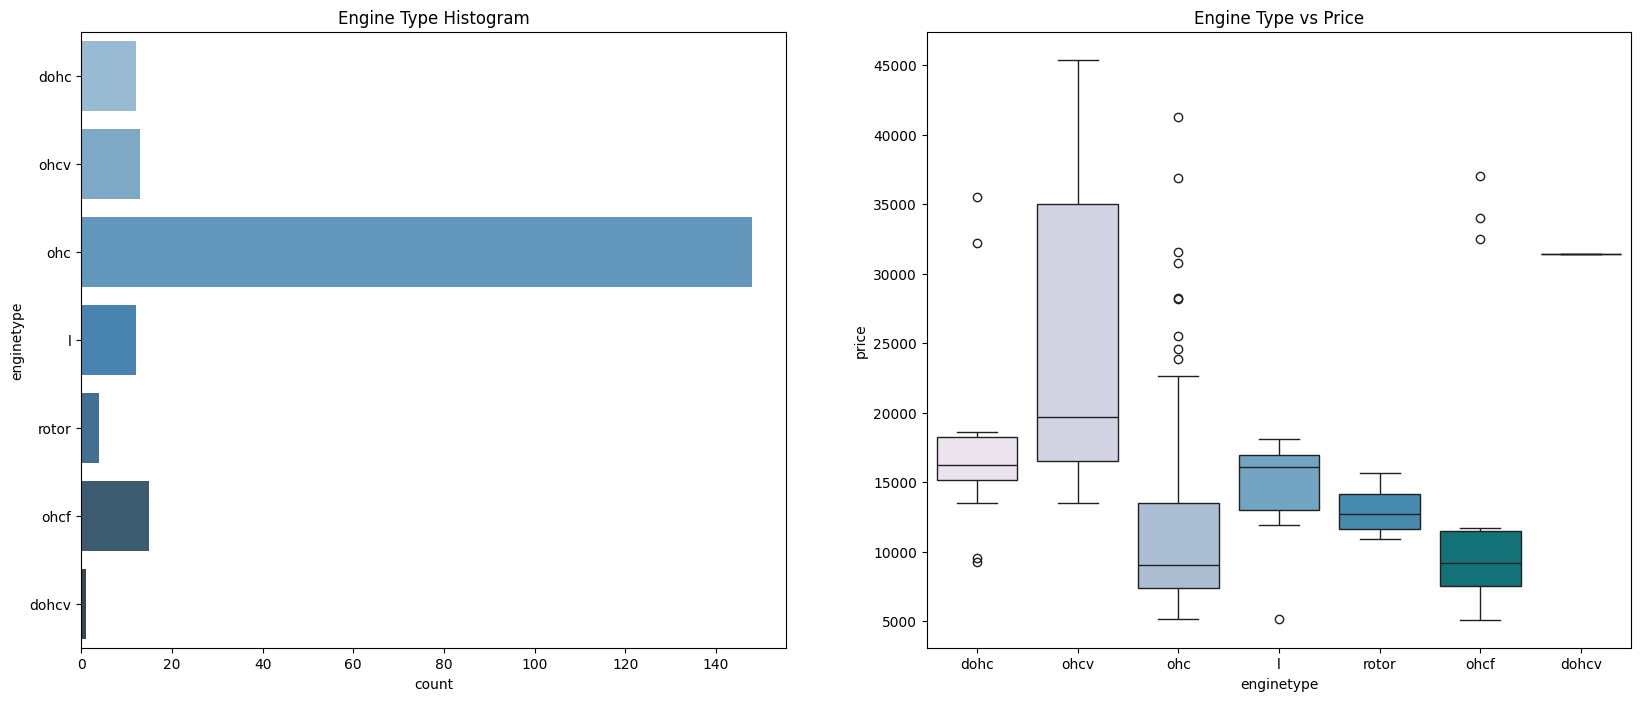

In [26]:
# Lets plot this

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

In [27]:
cars.groupby(["enginetype"])["price"].mean().sort_values(ascending=False)

enginetype
dohcv    31400.500000
ohcv     25098.384615
dohc     18116.416667
l        14627.583333
ohcf     13738.600000
rotor    13020.000000
ohc      11574.048426
Name: price, dtype: float64

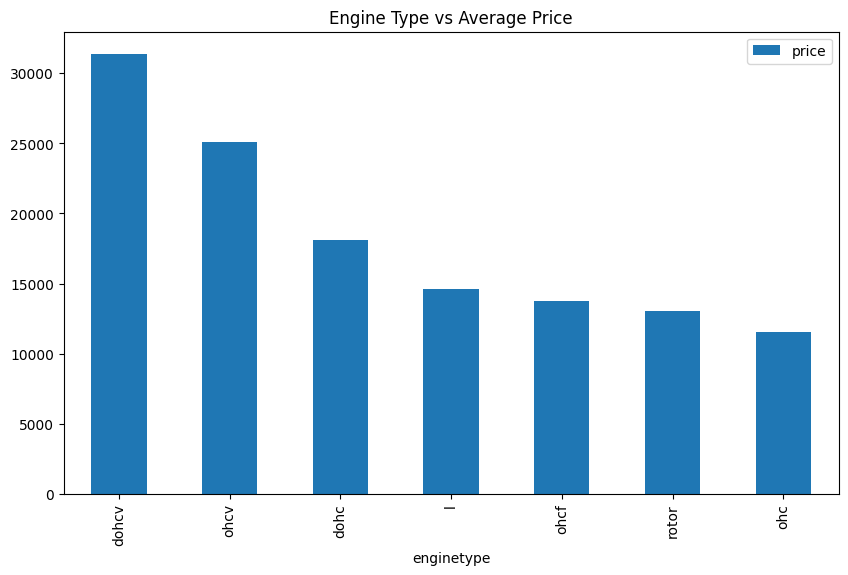

In [28]:
# Lets plot this
df = pd.DataFrame(cars.groupby(["enginetype"])["price"].mean().sort_values(ascending=False))
df.plot.bar(figsize=(10,6))
plt.title('Engine Type vs Average Price')
plt.show()

In [29]:
# Inference:
# 1. ohcv engine type has the highest average price.
# 2. ohc engine type seems to be the most preferred choice.

In [30]:
cars.groupby(["CompanyName"])["price"].mean().sort_values(ascending=False)

CompanyName
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

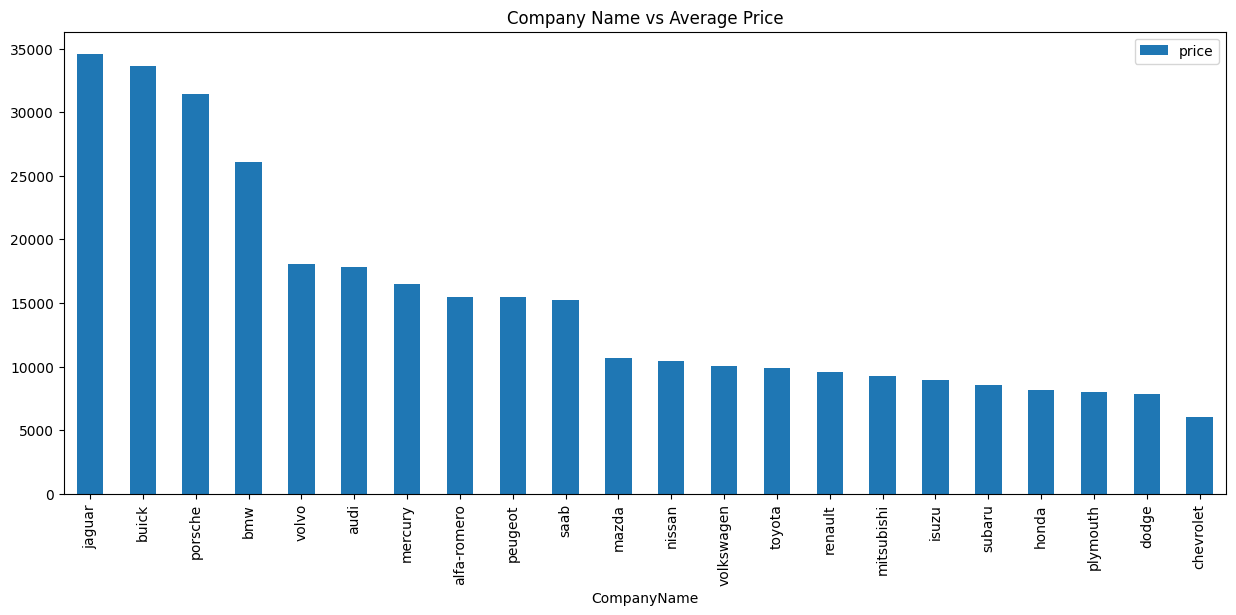

In [31]:
# Lets plot this
df = pd.DataFrame(cars.groupby(["CompanyName"])["price"].mean().sort_values(ascending=False))
df.plot.bar(figsize=(15,6))
plt.title('Company Name vs Average Price')
plt.show()

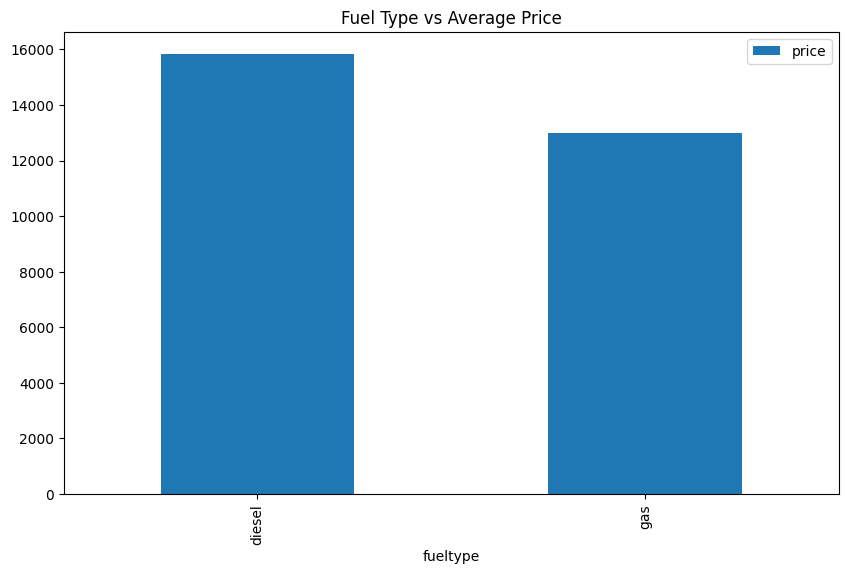

In [32]:
# Lets plot this
df = pd.DataFrame(cars.groupby(["fueltype"])["price"].mean().sort_values(ascending=False))
df.plot.bar(figsize=(10,6))
plt.title('Fuel Type vs Average Price')
plt.show()

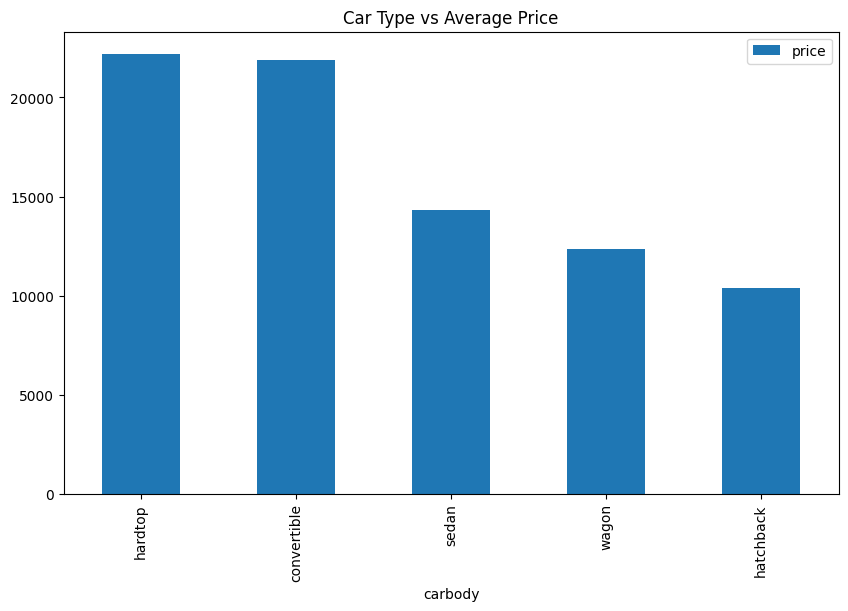

In [33]:
# Lets plot this
df = pd.DataFrame(cars.groupby(["carbody"])["price"].mean().sort_values(ascending=False))
df.plot.bar(figsize=(10,6))
plt.title('Car Type vs Average Price')
plt.show()

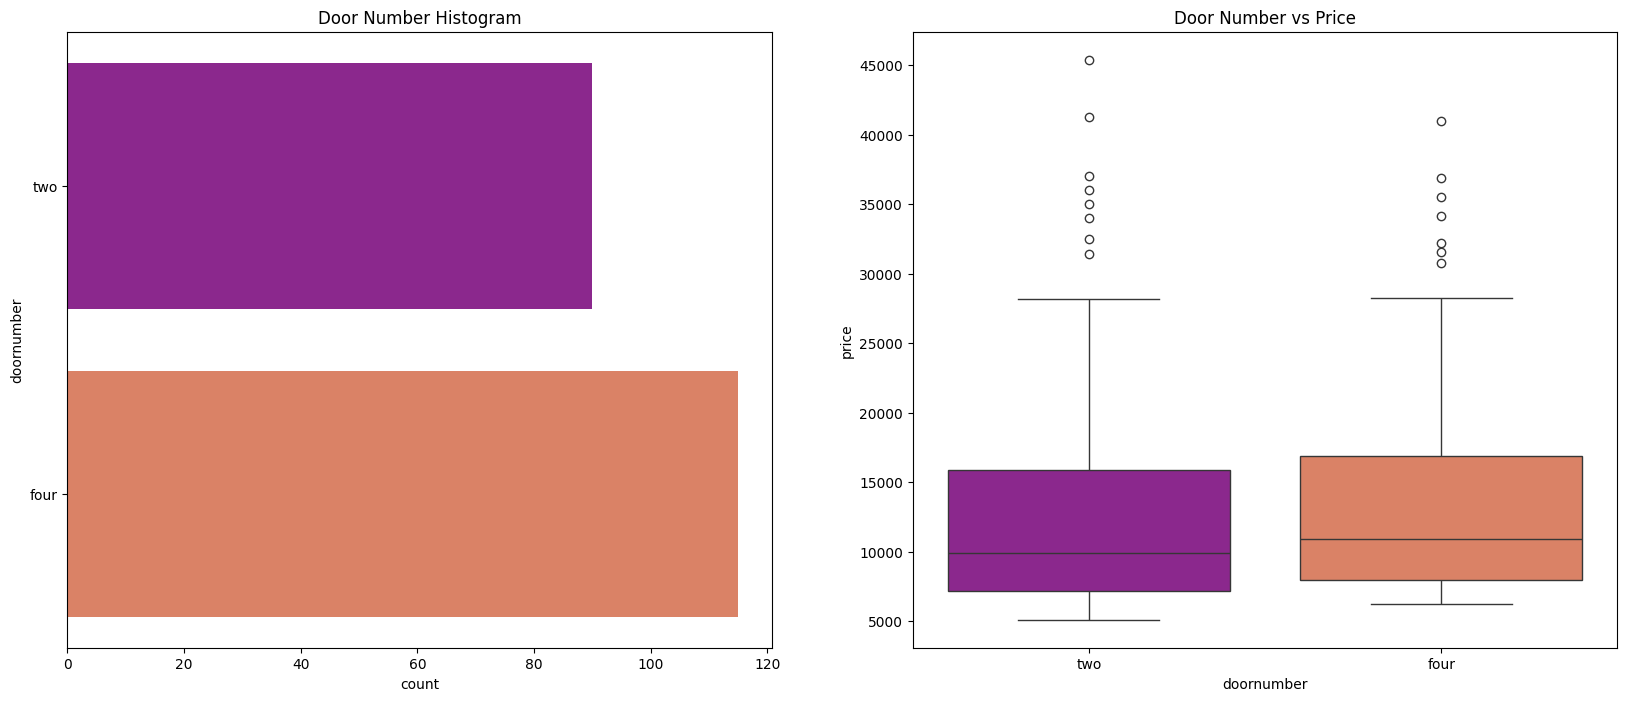

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

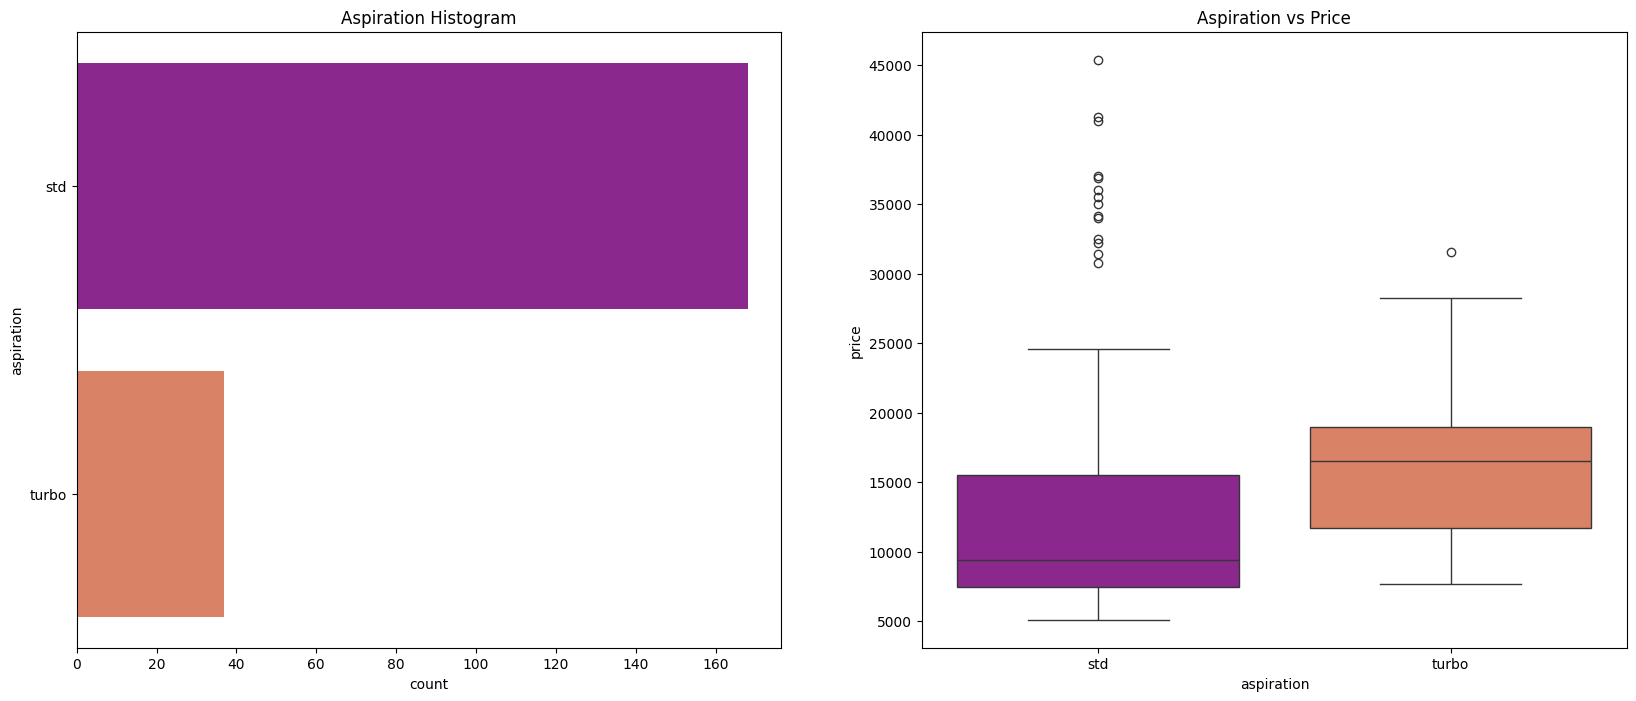

In [35]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

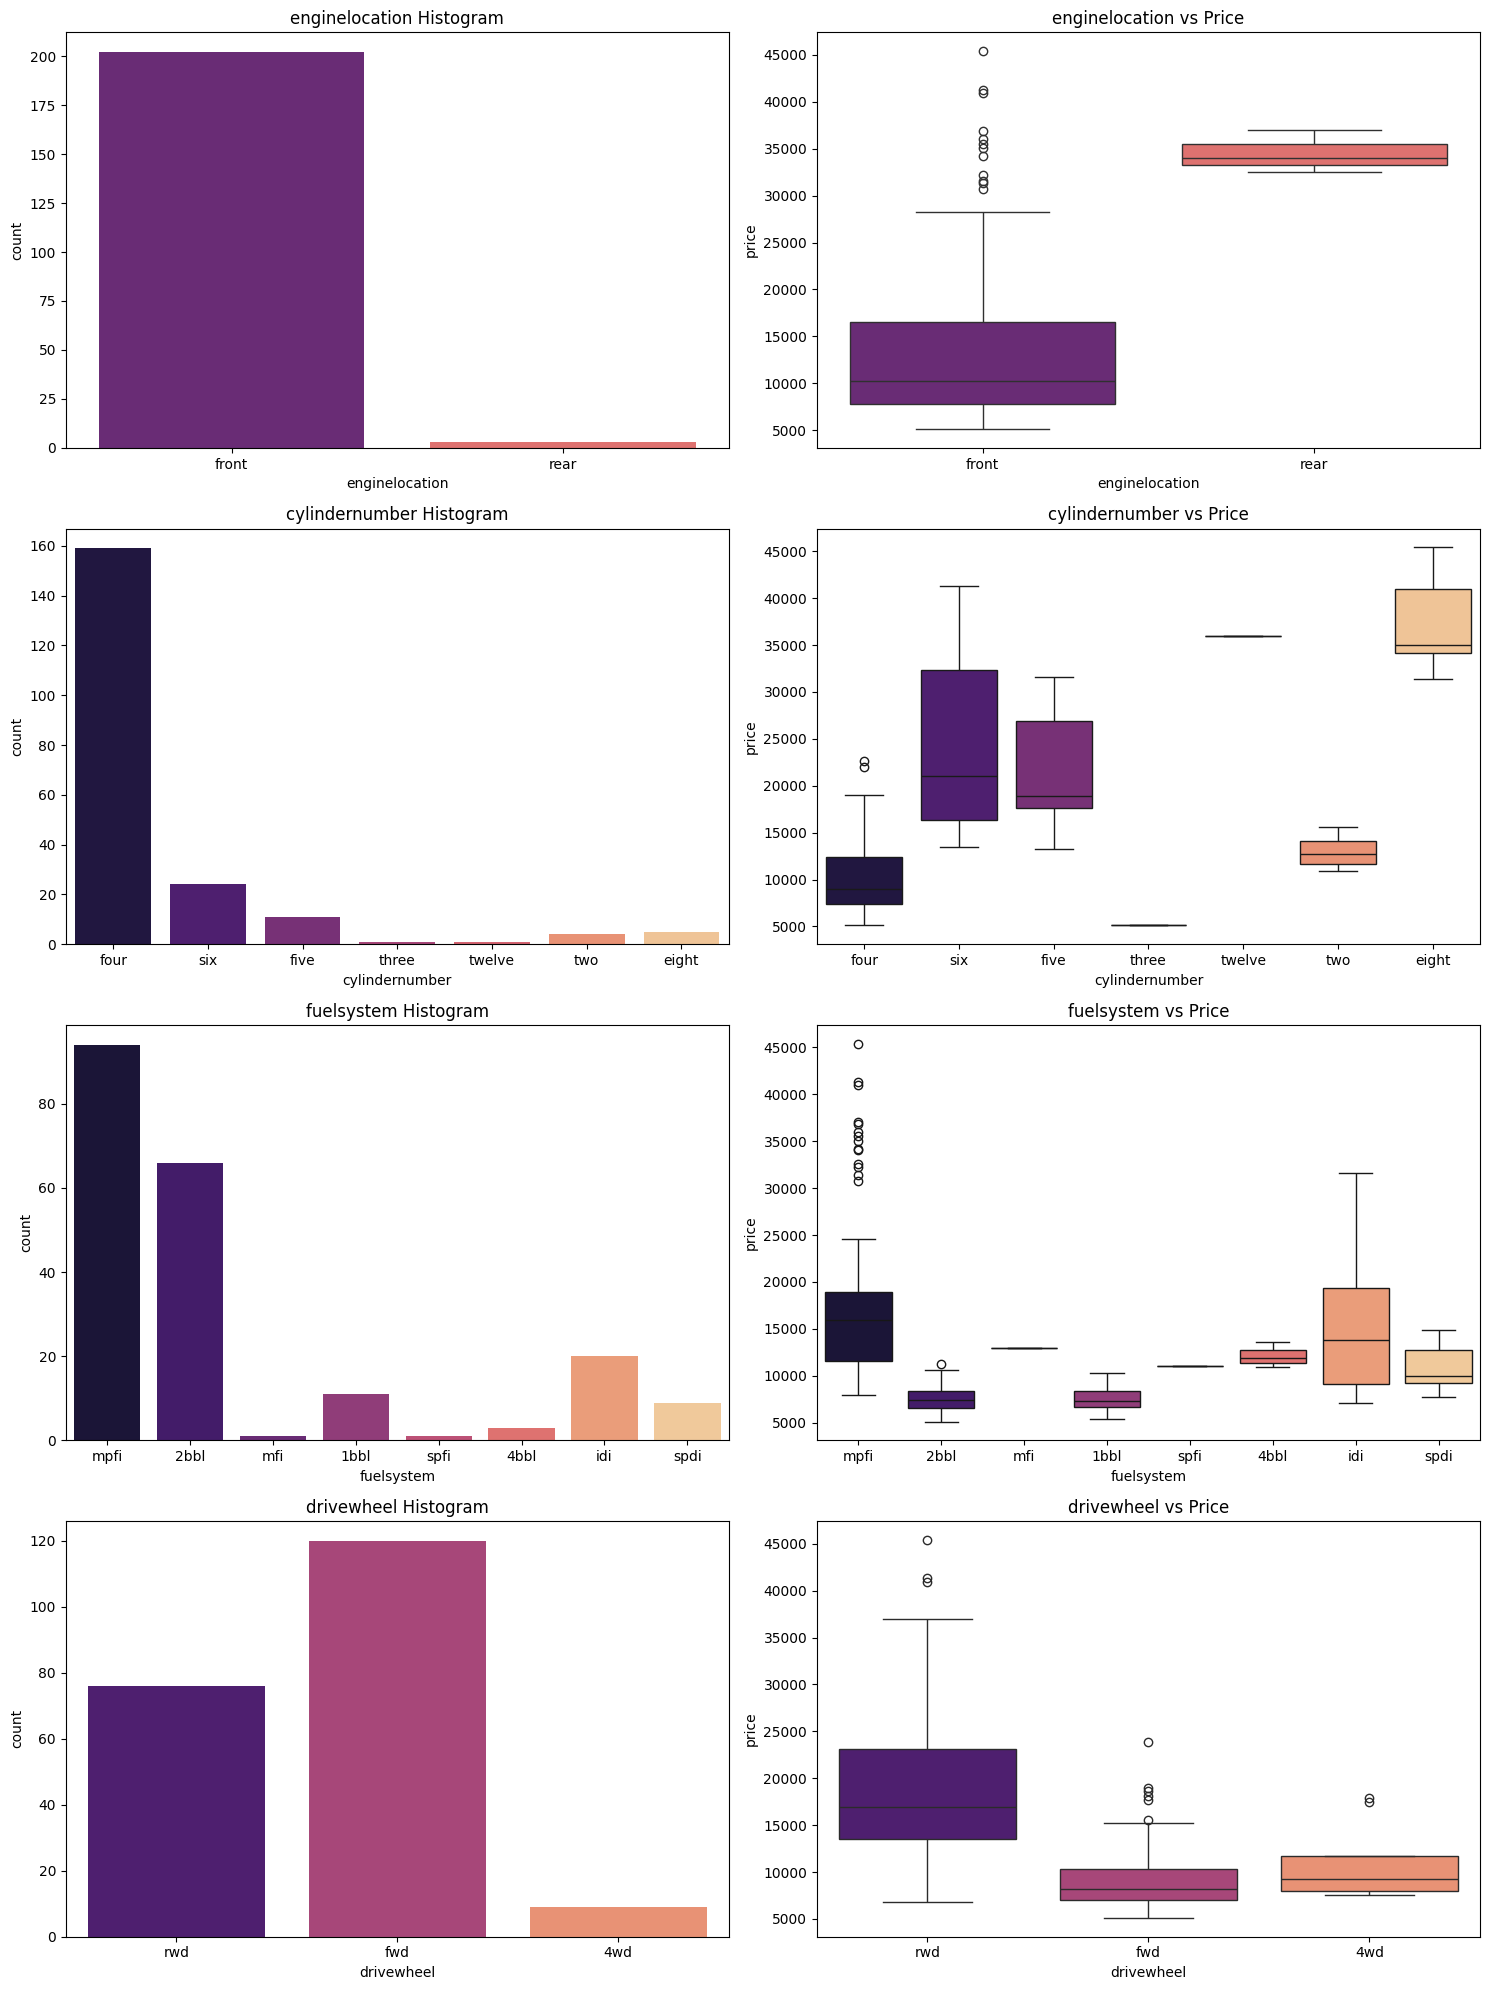

In [36]:
def plot_count(x, fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(data=cars, x=x, palette='magma')
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=x, y='price', data=cars, palette='magma')

plt.figure(figsize=(15, 20))
plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout() # adjust the subplots to fit into the figure area.
plt.show()

In [37]:
# Inference:
# 1. Very few datapoints for enginelocation categories to make an inference.
# 2. Most cars have four cylinders.
# 3. mpfi and 2bbl are the most common fuel systems.
# 4. Most cars have fwd drivewheel.

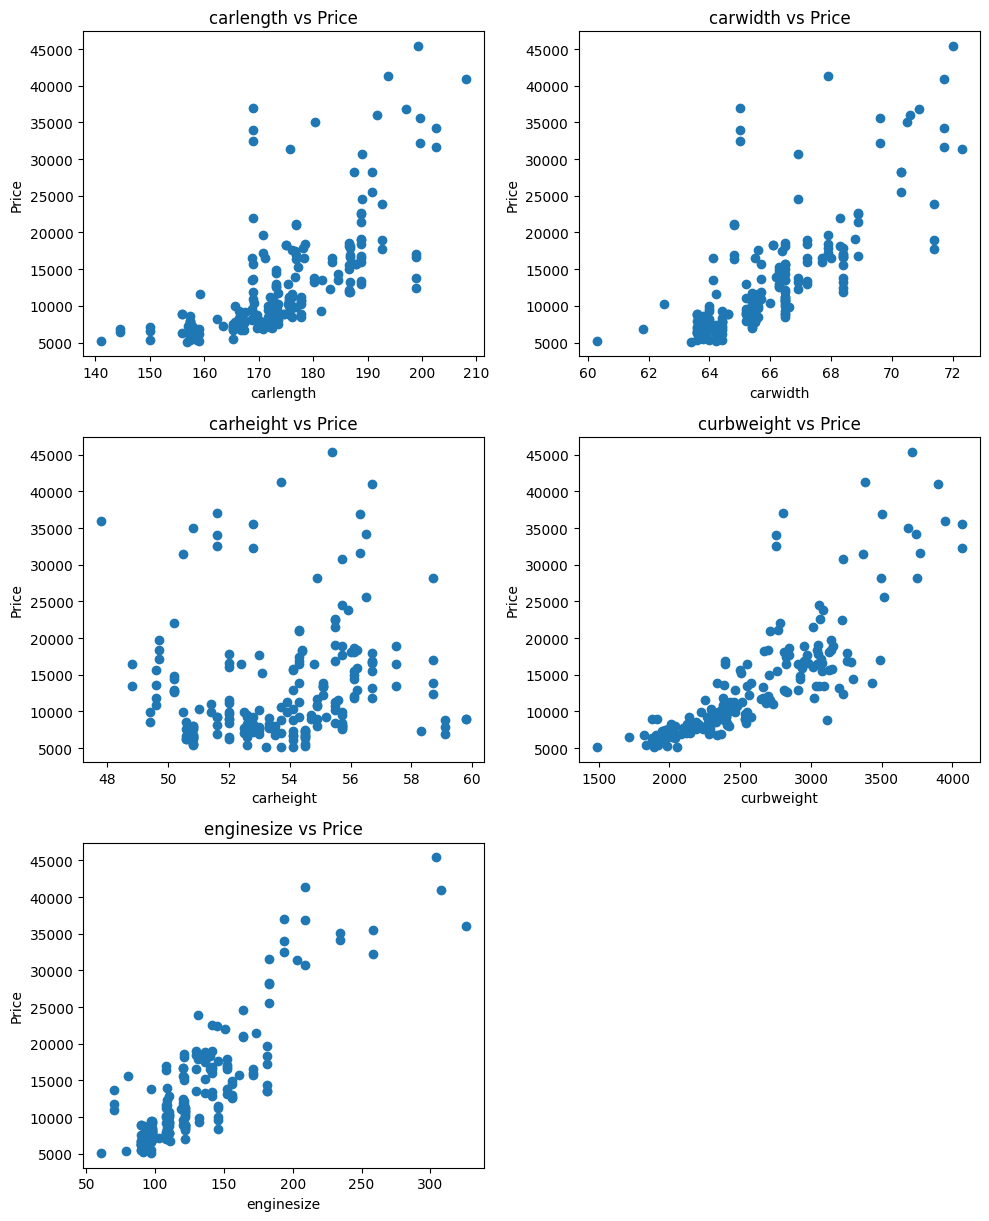

In [38]:
# Visualize numerical data

def scatter(x, fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x], cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10, 20))
scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('enginesize', 5)

plt.tight_layout()
plt.show()

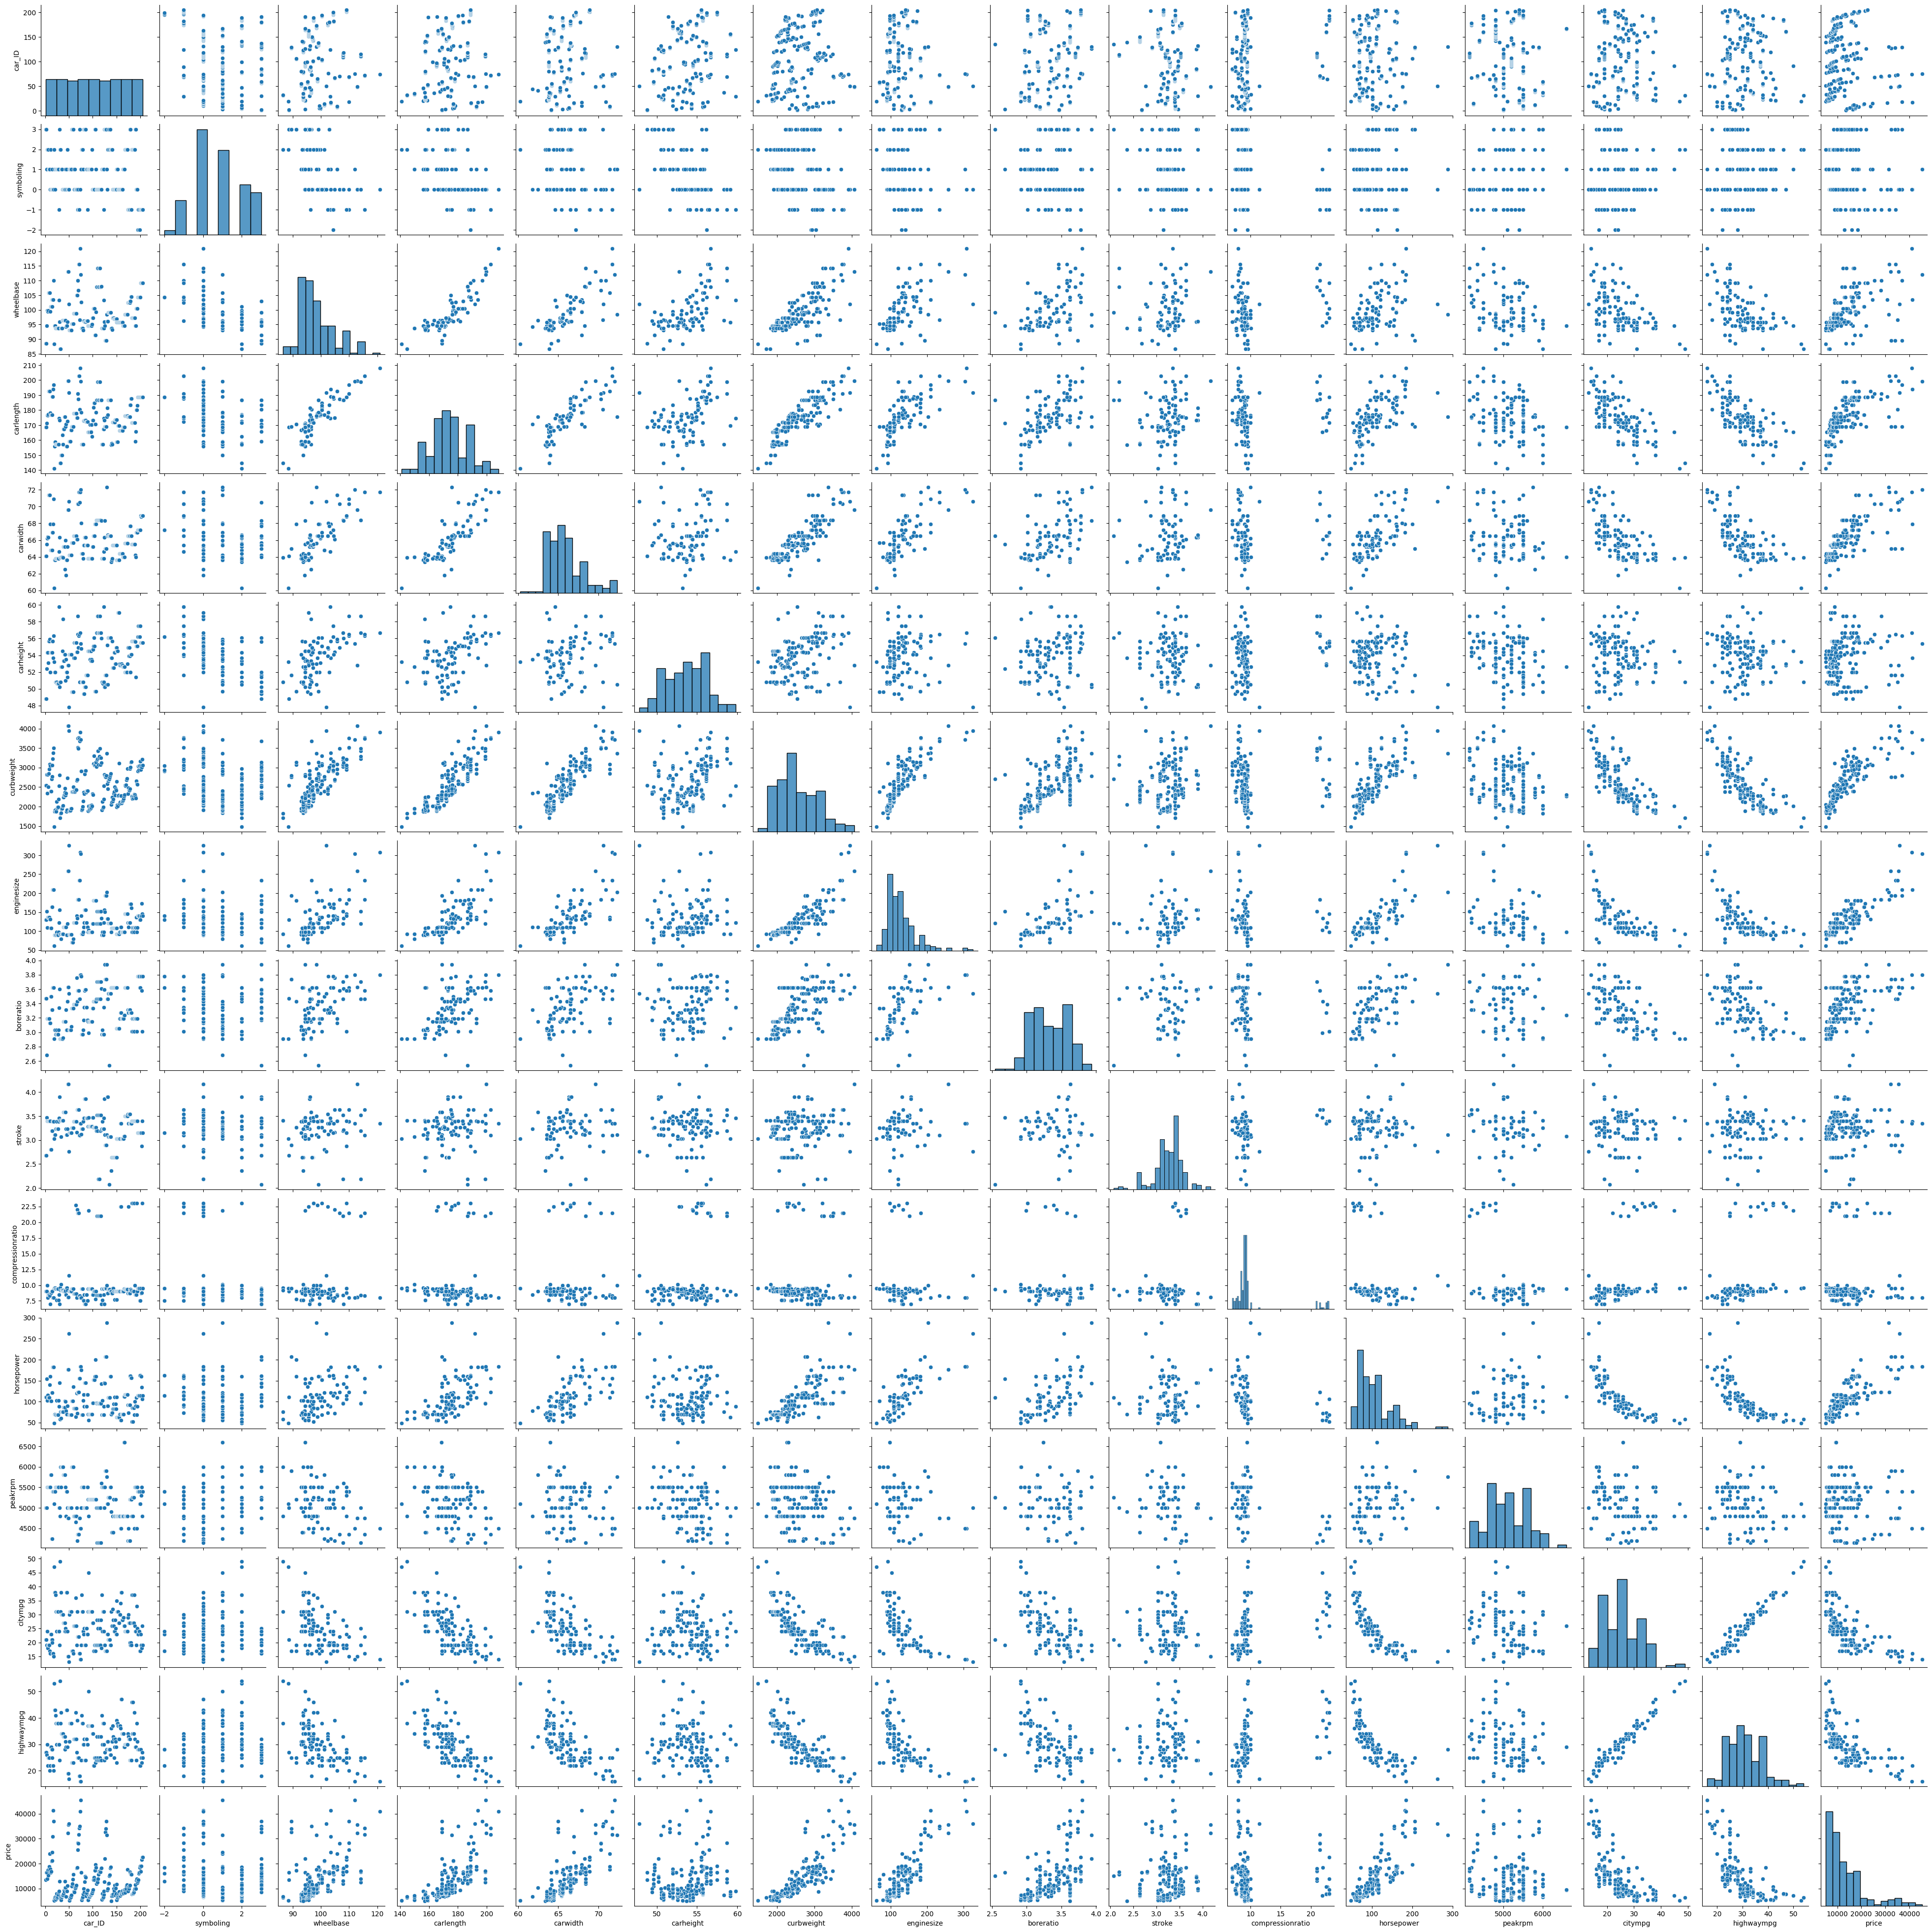

In [39]:
sns.pairplot(cars)
plt.show()

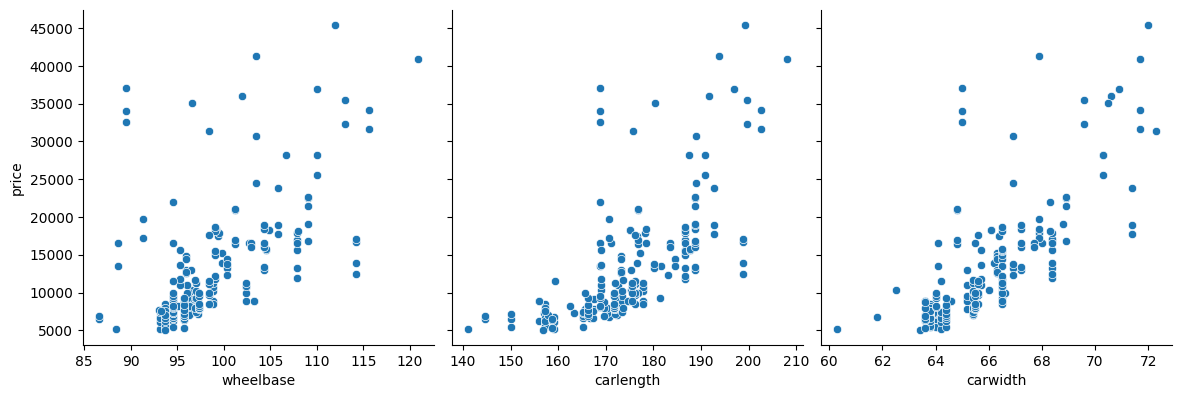

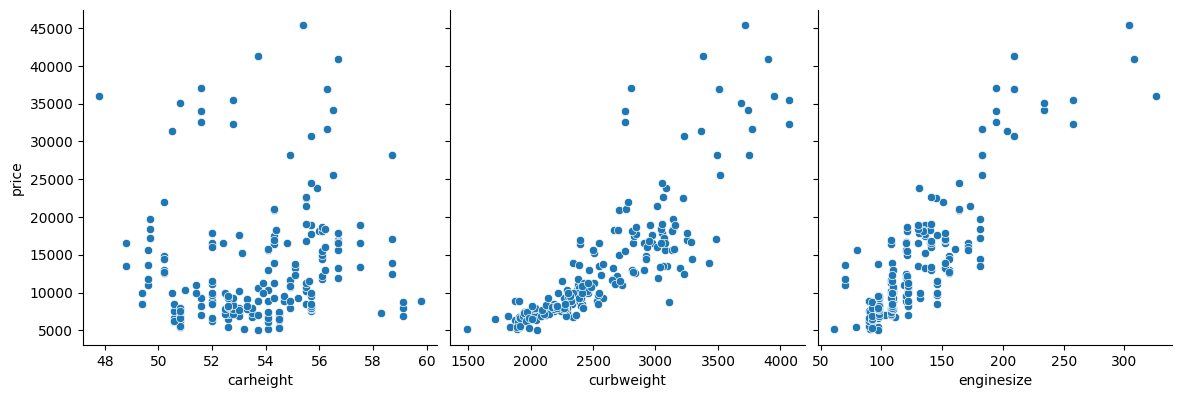

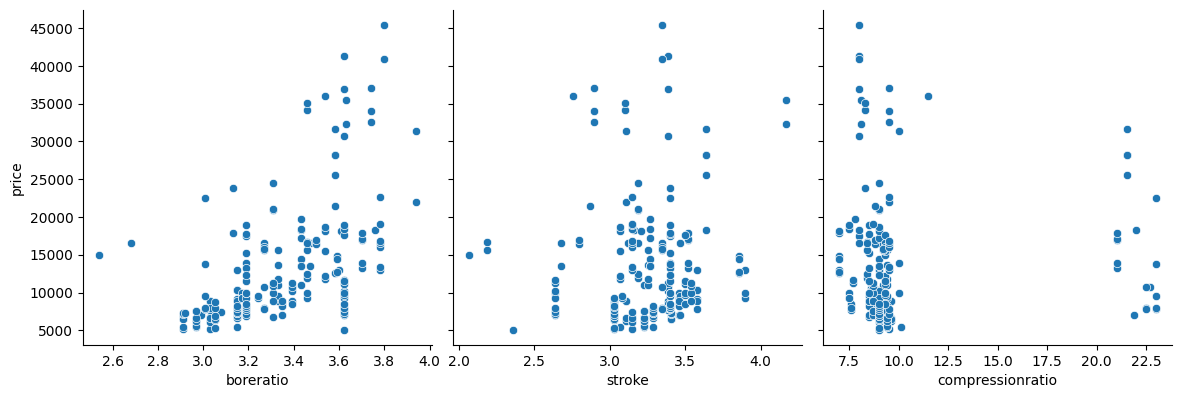

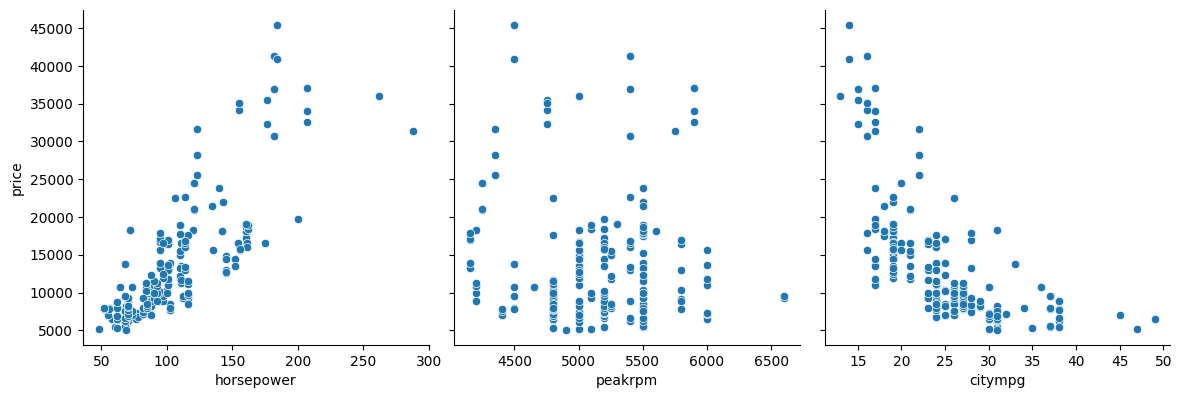

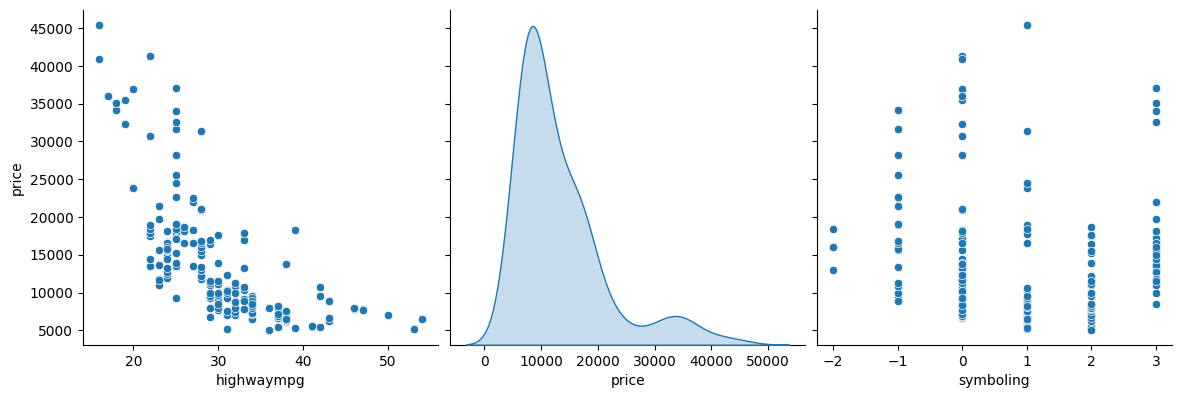

In [40]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price', diag_kind='kde', height=4, aspect=1, kind='scatter', palette='magma')
    plt.show()

pp('wheelbase', 'carlength', 'carwidth')
pp('carheight', 'curbweight', 'enginesize')
pp('boreratio', 'stroke', 'compressionratio')
pp('horsepower', 'peakrpm', 'citympg')
pp('highwaympg', 'price', 'symboling')

In [41]:
# Deriving new features i.e. Feature Engineering
# Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  fueleconomy  
0  13495.0        23.70  
1  16500.0        23.70  
2  16500.0        22.15  
3  13950.0        26.70  
4  17450.0        19.80

In [42]:
# Binning the Car Companies based on avg prices of each Company.

cars['price'] = cars['price'].astype('int')
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  \
0    2.68               9.0         111     5000       21          27  13495   
1    2.68               9.0         111     5000       21          27  16500   
2    3.47               9.0         154     5000       19          26  16500   
3    3.40              10.0         102     5500       24          30  13950   
4    3.40               8.0         115     5500       18          22  17450   

   fueleconomy  
0        23.70  
1        23.70  
2        22.15  
3        26.70  
4        19.80

In [43]:
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left', on='CompanyName')
bins = [0, 10000, 20000, 40000]
cars_bin = ['Budget', 'Medium', 'Highend']
cars['carsrange'] = pd.cut(temp['price_y'], bins, right=False, labels=cars_bin)
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  \
0    2.68               9.0         111     5000       21          27  13495   
1    2.68               9.0         111     5000       21          27  16500   
2    3.47               9.0         154     5000       19          26  16500   
3    3.40              10.0         102     5500       24          30  13950   
4    3.40               8.0         115     5500       18          22  17450   

   fueleconomy carsrange  
0        23.70    Medium  
1        23.70    Medium  
2        22.15    Medium  
3        26.70    Medium  
4        19.80    Medium

In [44]:
cars.carsrange.value_counts()


carsrange
Budget     95
Medium     86
Highend    24
Name: count, dtype: int64

Text(0, 0.5, 'Price')

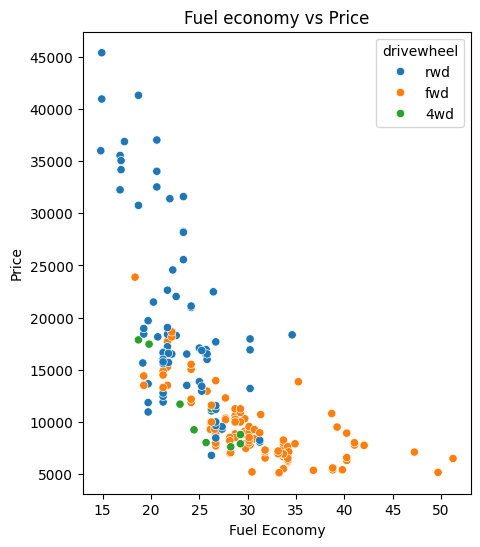

In [45]:
# Bivariate Analysis

plt.figure(figsize=(5,6))

plt.title("Fuel economy vs Price")
sns.scatterplot(x=cars['fueleconomy'], y=cars['price'], hue=cars['drivewheel'])
plt.xlabel("Fuel Economy")
plt.ylabel("Price")

In [46]:
# List of significant variables after visual analysis
# 1. Car Range
# 2. Engine Type
# 3. Fuel Type
# 4. Car Body
# 5. Aspiration
# 6. Cylinder Number
# 7. Drivewheel
# 8. Curbweight
# 9. Car Length
# 10. Car Width
# 11. Engine Size
# 12. Boreratio
# 13. Horse Power
# 14. Wheel Base
# 15. Fuel Economy

In [47]:
len(cars.columns)

28

In [48]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495      gas        std  convertible        rwd       88.6        2548   
1  16500      gas        std  convertible        rwd       88.6        2548   
2  16500      gas        std    hatchback        rwd       94.5        2823   
3  13950      gas        std        sedan        fwd       99.8        2337   
4  17450      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  fueleconomy  \
0       dohc           four         130       3.47         111        23.70   
1       dohc           four         130       3.47         111        23.70   
2       ohcv            six         152       2.68         154        22.15   
3        ohc           four         109       3.19         102        26.70   
4        ohc           five         136       3.19         115        19.80   

   carlength  carwidth carsrange  
0      168.8      64.1    Medium  
1      168.8      64.1    Medium  
2      171.2      65.5    Medium  
3      176.6      66.2    Medium  
4      176.6      66.4    Medium

In [49]:
len(cars_lr.columns)

16

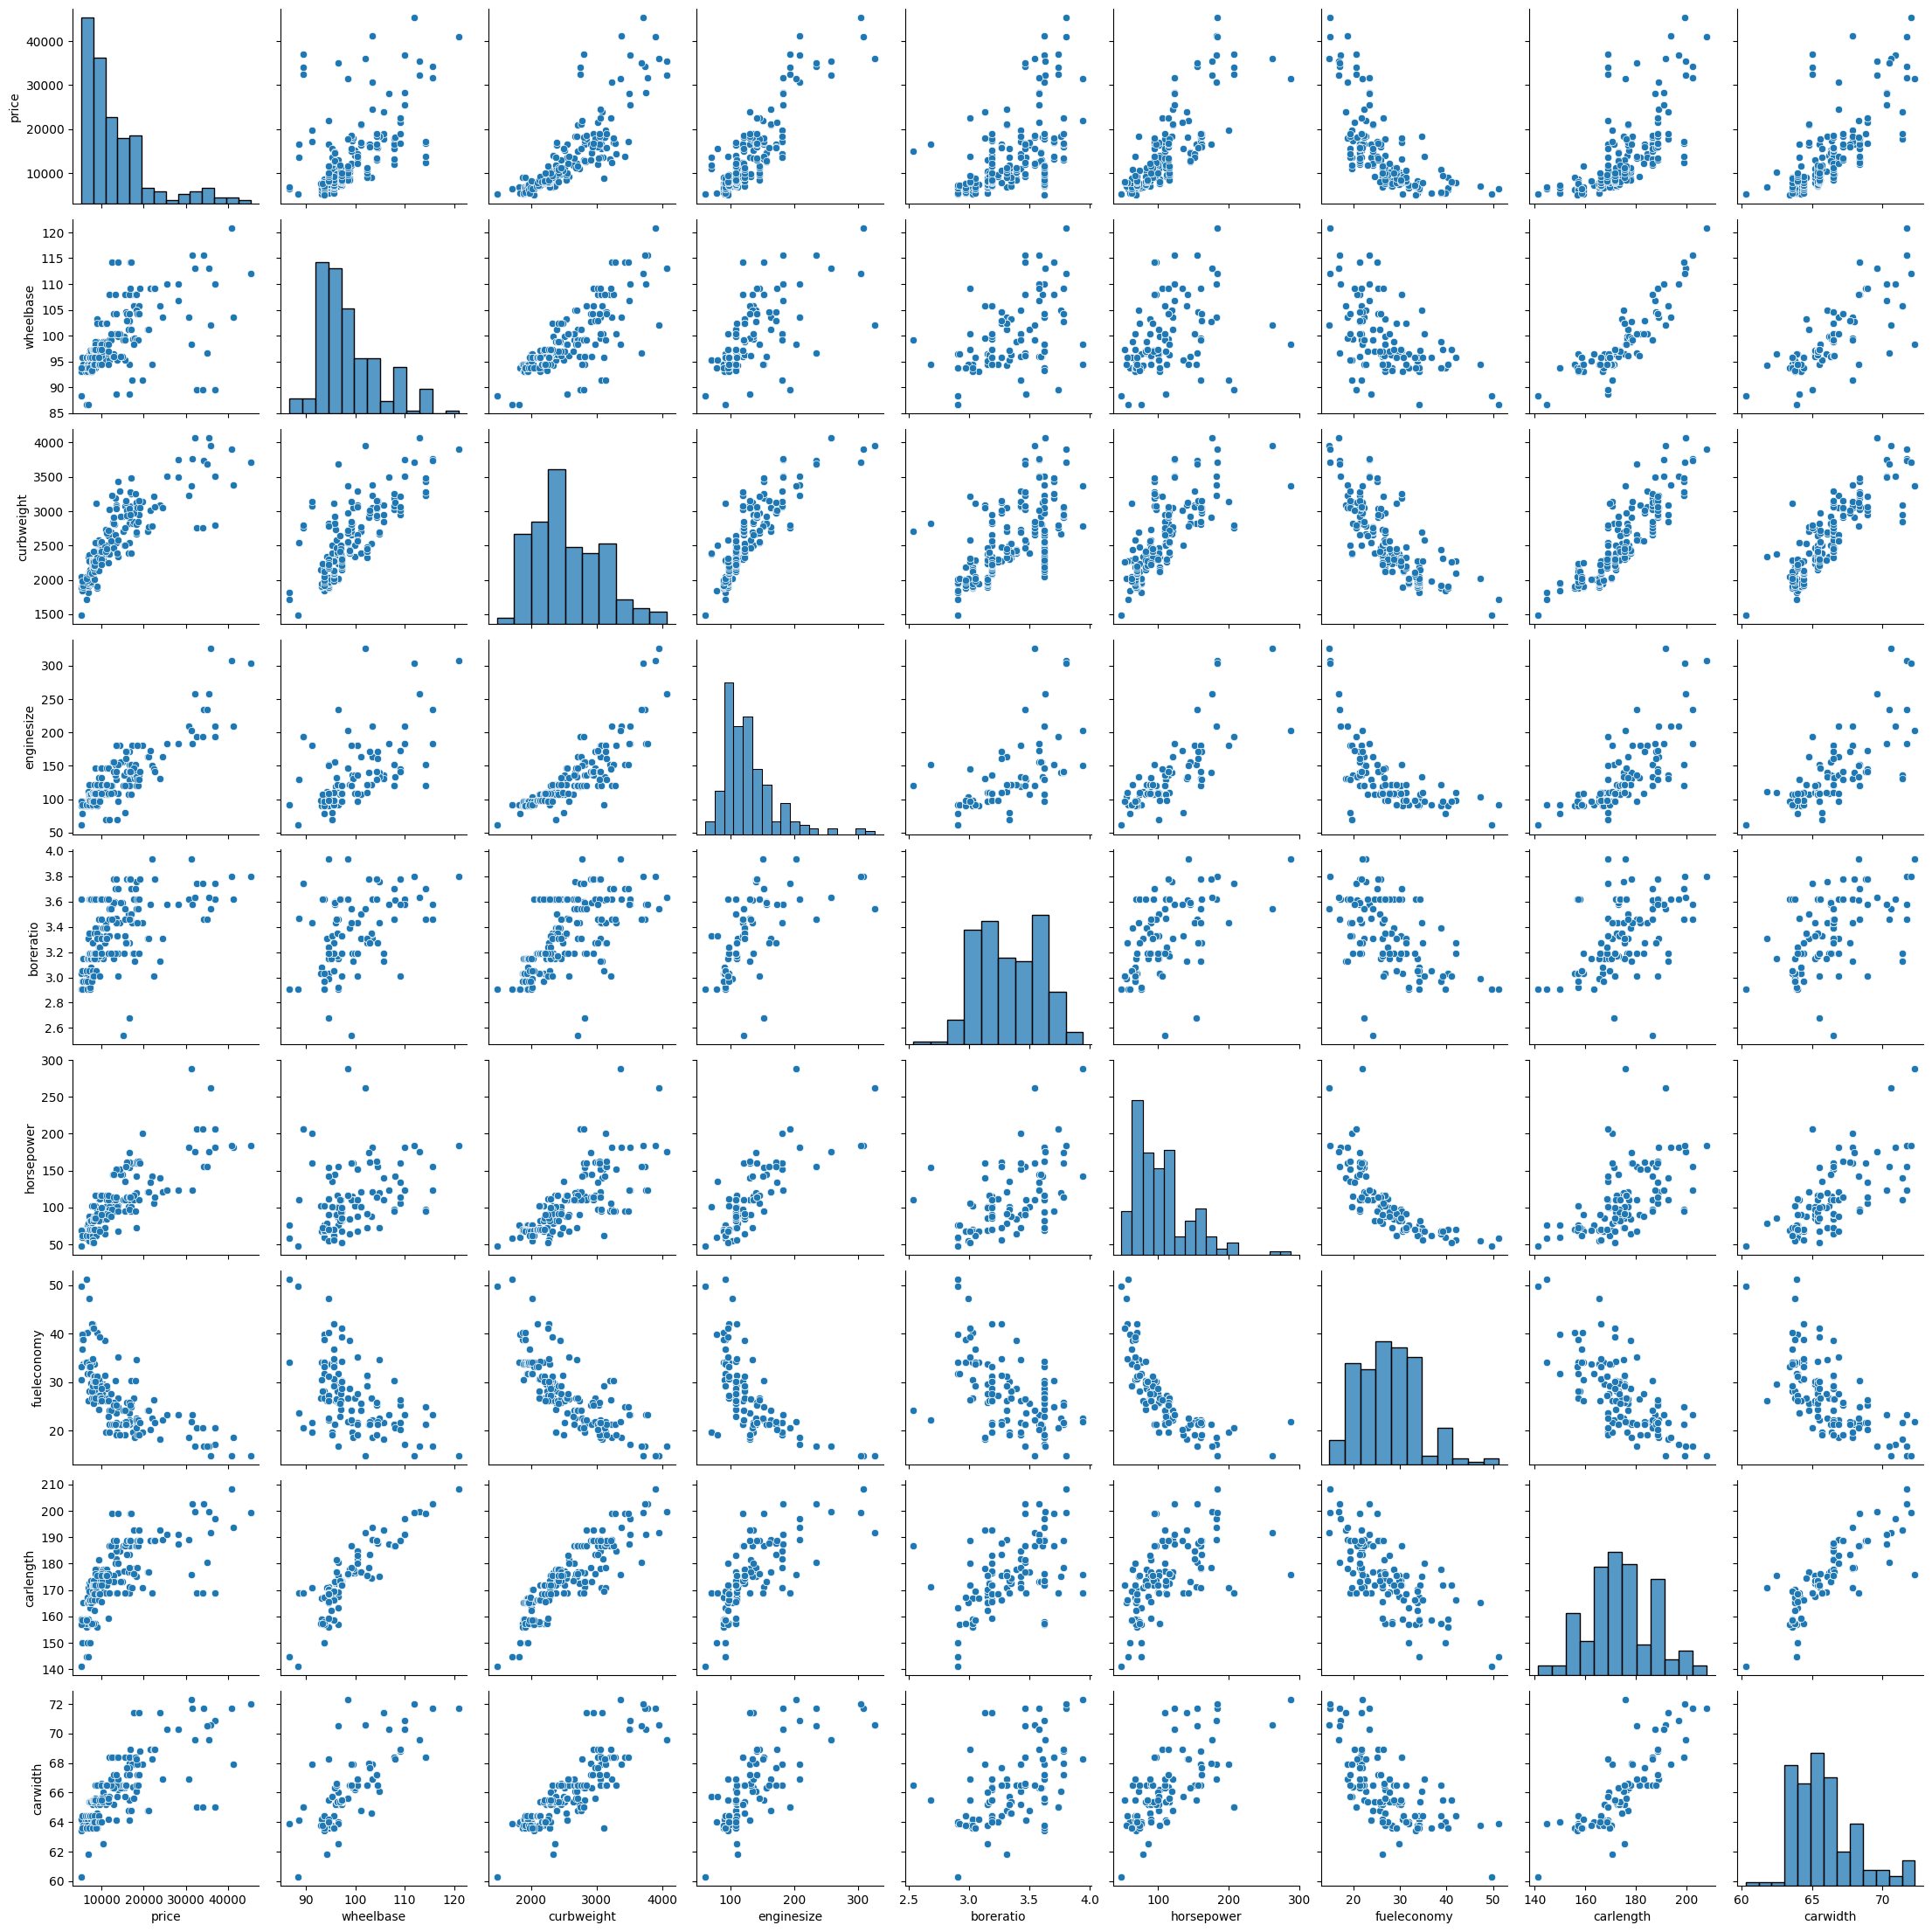

In [50]:
sns.pairplot(cars_lr)
plt.show()

In [51]:
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  \
0    2.68               9.0         111     5000       21          27  13495   
1    2.68               9.0         111     5000       21          27  16500   
2    3.47               9.0         154     5000       19          26  16500   
3    3.40              10.0         102     5500       24          30  13950   
4    3.40               8.0         115     5500       18          22  17450   

   fueleconomy carsrange  
0        23.70    Medium  
1        23.70    Medium  
2        22.15    Medium  
3        26.70    Medium  
4        19.80    Medium

### Step 6 : Dummy Variables / Dummification / One Hot Encoding

https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

In [52]:
# Dummification

# Education: PG, G, UG, PG, G, G, PG, UG, PG, G, UG, PG, G, PG, G, PG, G
# Dummy variables: PG, G, UG
# PG = 1, 0, 0
# G = 0, 1, 0
# UG = 0, 0, 1

In [53]:
cars_lr.select_dtypes(["object"]).head()

fueltype aspiration      carbody drivewheel enginetype cylindernumber
0      gas        std  convertible        rwd       dohc           four
1      gas        std  convertible        rwd       dohc           four
2      gas        std    hatchback        rwd       ohcv            six
3      gas        std        sedan        fwd        ohc           four
4      gas        std        sedan        4wd        ohc           five

In [54]:
for c in cars_lr.select_dtypes(["object",'category']).columns:
    print(cars_lr[c].value_counts())
    print("="*70)

fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64
carsrange
Budget     95
Medium     86
Highend    24
Name: count, dtype: int64


In [55]:
cat_cols = list(cars_lr.select_dtypes(["object",'category']).columns)
cat_cols

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'carsrange']

In [56]:
cars_lr = pd.get_dummies(cars_lr, columns=cat_cols, drop_first=True, dtype='int')
cars_lr.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  13495       88.6        2548         130       3.47         111   
1  16500       88.6        2548         130       3.47         111   
2  16500       94.5        2823         152       2.68         154   
3  13950       99.8        2337         109       3.19         102   
4  17450       99.4        2824         136       3.19         115   

   fueleconomy  carlength  carwidth  fueltype_gas  aspiration_turbo  \
0        23.70      168.8      64.1             1                 0   
1        23.70      168.8      64.1             1                 0   
2        22.15      171.2      65.5             1                 0   
3        26.70      176.6      66.2             1                 0   
4        19.80      176.6      66.4             1                 0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   
1                0                  0              0              0   
2                0                  1              0              0   
3                0                  0              1              0   
4                0                  0              1              0   

   drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
0               0               1                 0             0   
1               0               1                 0             0   
2               0               1                 0             0   
3               1               0                 0             0   
4               0               0                 0             0   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
0               0                0                0                 0   
1               0                0                0                 0   
2               0                0                1                 0   
3               1                0                0                 0   
4               1                0                0                 0   

   cylindernumber_five  cylindernumber_four  cylindernumber_six  \
0                    0                    1                   0   
1                    0                    1                   0   
2                    0                    0                   1   
3                    0                    1                   0   
4                    1                    0                   0   

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   carsrange_Medium  carsrange_Highend  
0                 1                  0  
1                 1                  0  
2                 1                  0  
3                 1                  0  
4                 1                  0

In [57]:
len(cars_lr.columns)

31

In [58]:
cars_lr.fueltype_gas.value_counts()

fueltype_gas
1    185
0     20
Name: count, dtype: int64

In [59]:
cars_lr.shape

(205, 31)

### Step 7 : Train-Test Split and feature scaling

In [60]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(
    cars_lr, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [62]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122  0.068818   0.244828    0.272692    0.139623   0.230159    0.083333   
125  0.466890   0.272414    0.500388    0.339623   1.000000    0.395833   
166  0.122110   0.272414    0.314973    0.139623   0.444444    0.266667   
1    0.314446   0.068966    0.411171    0.260377   0.626984    0.262500   
199  0.382131   0.610345    0.647401    0.260377   0.746032    0.475000   

     fueleconomy  carlength  carwidth  fueltype_gas  aspiration_turbo  \
122     0.530864   0.426016  0.291667             1                 0   
125     0.213992   0.452033  0.666667             1                 0   
166     0.344307   0.448780  0.308333             1                 0   
1       0.244170   0.450407  0.316667             1                 0   
199     0.122085   0.775610  0.575000             1                 1   

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
122                0                  0              1              0   
125                0                  1              0              0   
166                0                  1              0              0   
1                  0                  0              0              0   
199                0                  0              0              1   

     drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
122               1               0                 0             0   
125               0               1                 0             0   
166               0               1                 0             0   
1                 0               1                 0             0   
199               0               1                 0             0   

     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
122               1                0                0                 0   
125               1                0                0                 0   
166               0                0                0                 0   
1                 0                0                0                 0   
199               1                0                0                 0   

     cylindernumber_five  cylindernumber_four  cylindernumber_six  \
122                    0                    1                   0   
125                    0                    1                   0   
166                    0                    1                   0   
1                      0                    1                   0   
199                    0                    1                   0   

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
122                     0                      0                   0   
125                     0                      0                   0   
166                     0                      0                   0   
1                       0                      0                   0   
199                     0                      0                   0   

     carsrange_Medium  carsrange_Highend  
122                 0                  0  
125                 0                  1  
166                 0                  0  
1                   1                  0  
199                 1                  0

In [63]:
df_train.describe()

price   wheelbase  curbweight  enginesize   boreratio  horsepower  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.219309    0.411141    0.407878    0.241351    0.497946    0.227302   
std      0.215682    0.205581    0.211269    0.154619    0.207140    0.165511   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.067298    0.272414    0.245539    0.135849    0.305556    0.091667   
50%      0.140343    0.341379    0.355702    0.184906    0.500000    0.191667   
75%      0.313479    0.503448    0.559542    0.301887    0.682540    0.283333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       fueleconomy   carlength    carwidth  fueltype_gas  aspiration_turbo  \
count   143.000000  143.000000  143.000000    143.000000        143.000000   
mean      0.358265    0.525476    0.461655      0.909091          0.181818   
std       0.185980    0.204848    0.184517      0.288490          0.387050   
min       0.000000    0.000000    0.000000      0.000000          0.000000   
25%       0.198903    0.399187    0.304167      1.000000          0.000000   
50%       0.344307    0.502439    0.425000      1.000000          0.000000   
75%       0.512346    0.669919    0.550000      1.000000          0.000000   
max       1.000000    1.000000    1.000000      1.000000          1.000000   

       carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
count       143.000000         143.000000     143.000000     143.000000   
mean          0.020979           0.342657       0.475524       0.132867   
std           0.143818           0.476266       0.501156       0.340624   
min           0.000000           0.000000       0.000000       0.000000   
25%           0.000000           0.000000       0.000000       0.000000   
50%           0.000000           0.000000       0.000000       0.000000   
75%           0.000000           1.000000       1.000000       0.000000   
max           1.000000           1.000000       1.000000       1.000000   

       drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
count      143.000000      143.000000        143.000000    143.000000   
mean         0.594406        0.349650          0.006993      0.062937   
std          0.492733        0.478536          0.083624      0.243703   
min          0.000000        0.000000          0.000000      0.000000   
25%          0.000000        0.000000          0.000000      0.000000   
50%          1.000000        0.000000          0.000000      0.000000   
75%          1.000000        1.000000          0.000000      0.000000   
max          1.000000        1.000000          1.000000      1.000000   

       enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
count      143.000000       143.000000       143.000000        143.000000   
mean         0.685315         0.083916         0.062937          0.027972   
std          0.466023         0.278236         0.243703          0.165472   
min          0.000000         0.000000         0.000000          0.000000   
25%          0.000000         0.000000         0.000000          0.000000   
50%          1.000000         0.000000         0.000000          0.000000   
75%          1.000000         0.000000         0.000000          0.000000   
max          1.000000         1.000000         1.000000          1.000000   

       cylindernumber_five  cylindernumber_four  cylindernumber_six  \
count           143.000000           143.000000          143.000000   
mean              0.062937             0.741259            0.132867   
std               0.243703             0.439483            0.340624   
min               0.000000             0.000000            0.000000   
25%               0.000000             0.000000            0.000000   
50%               0.000000             1.000000            0.000000   
75%               0.000000             1.000000       

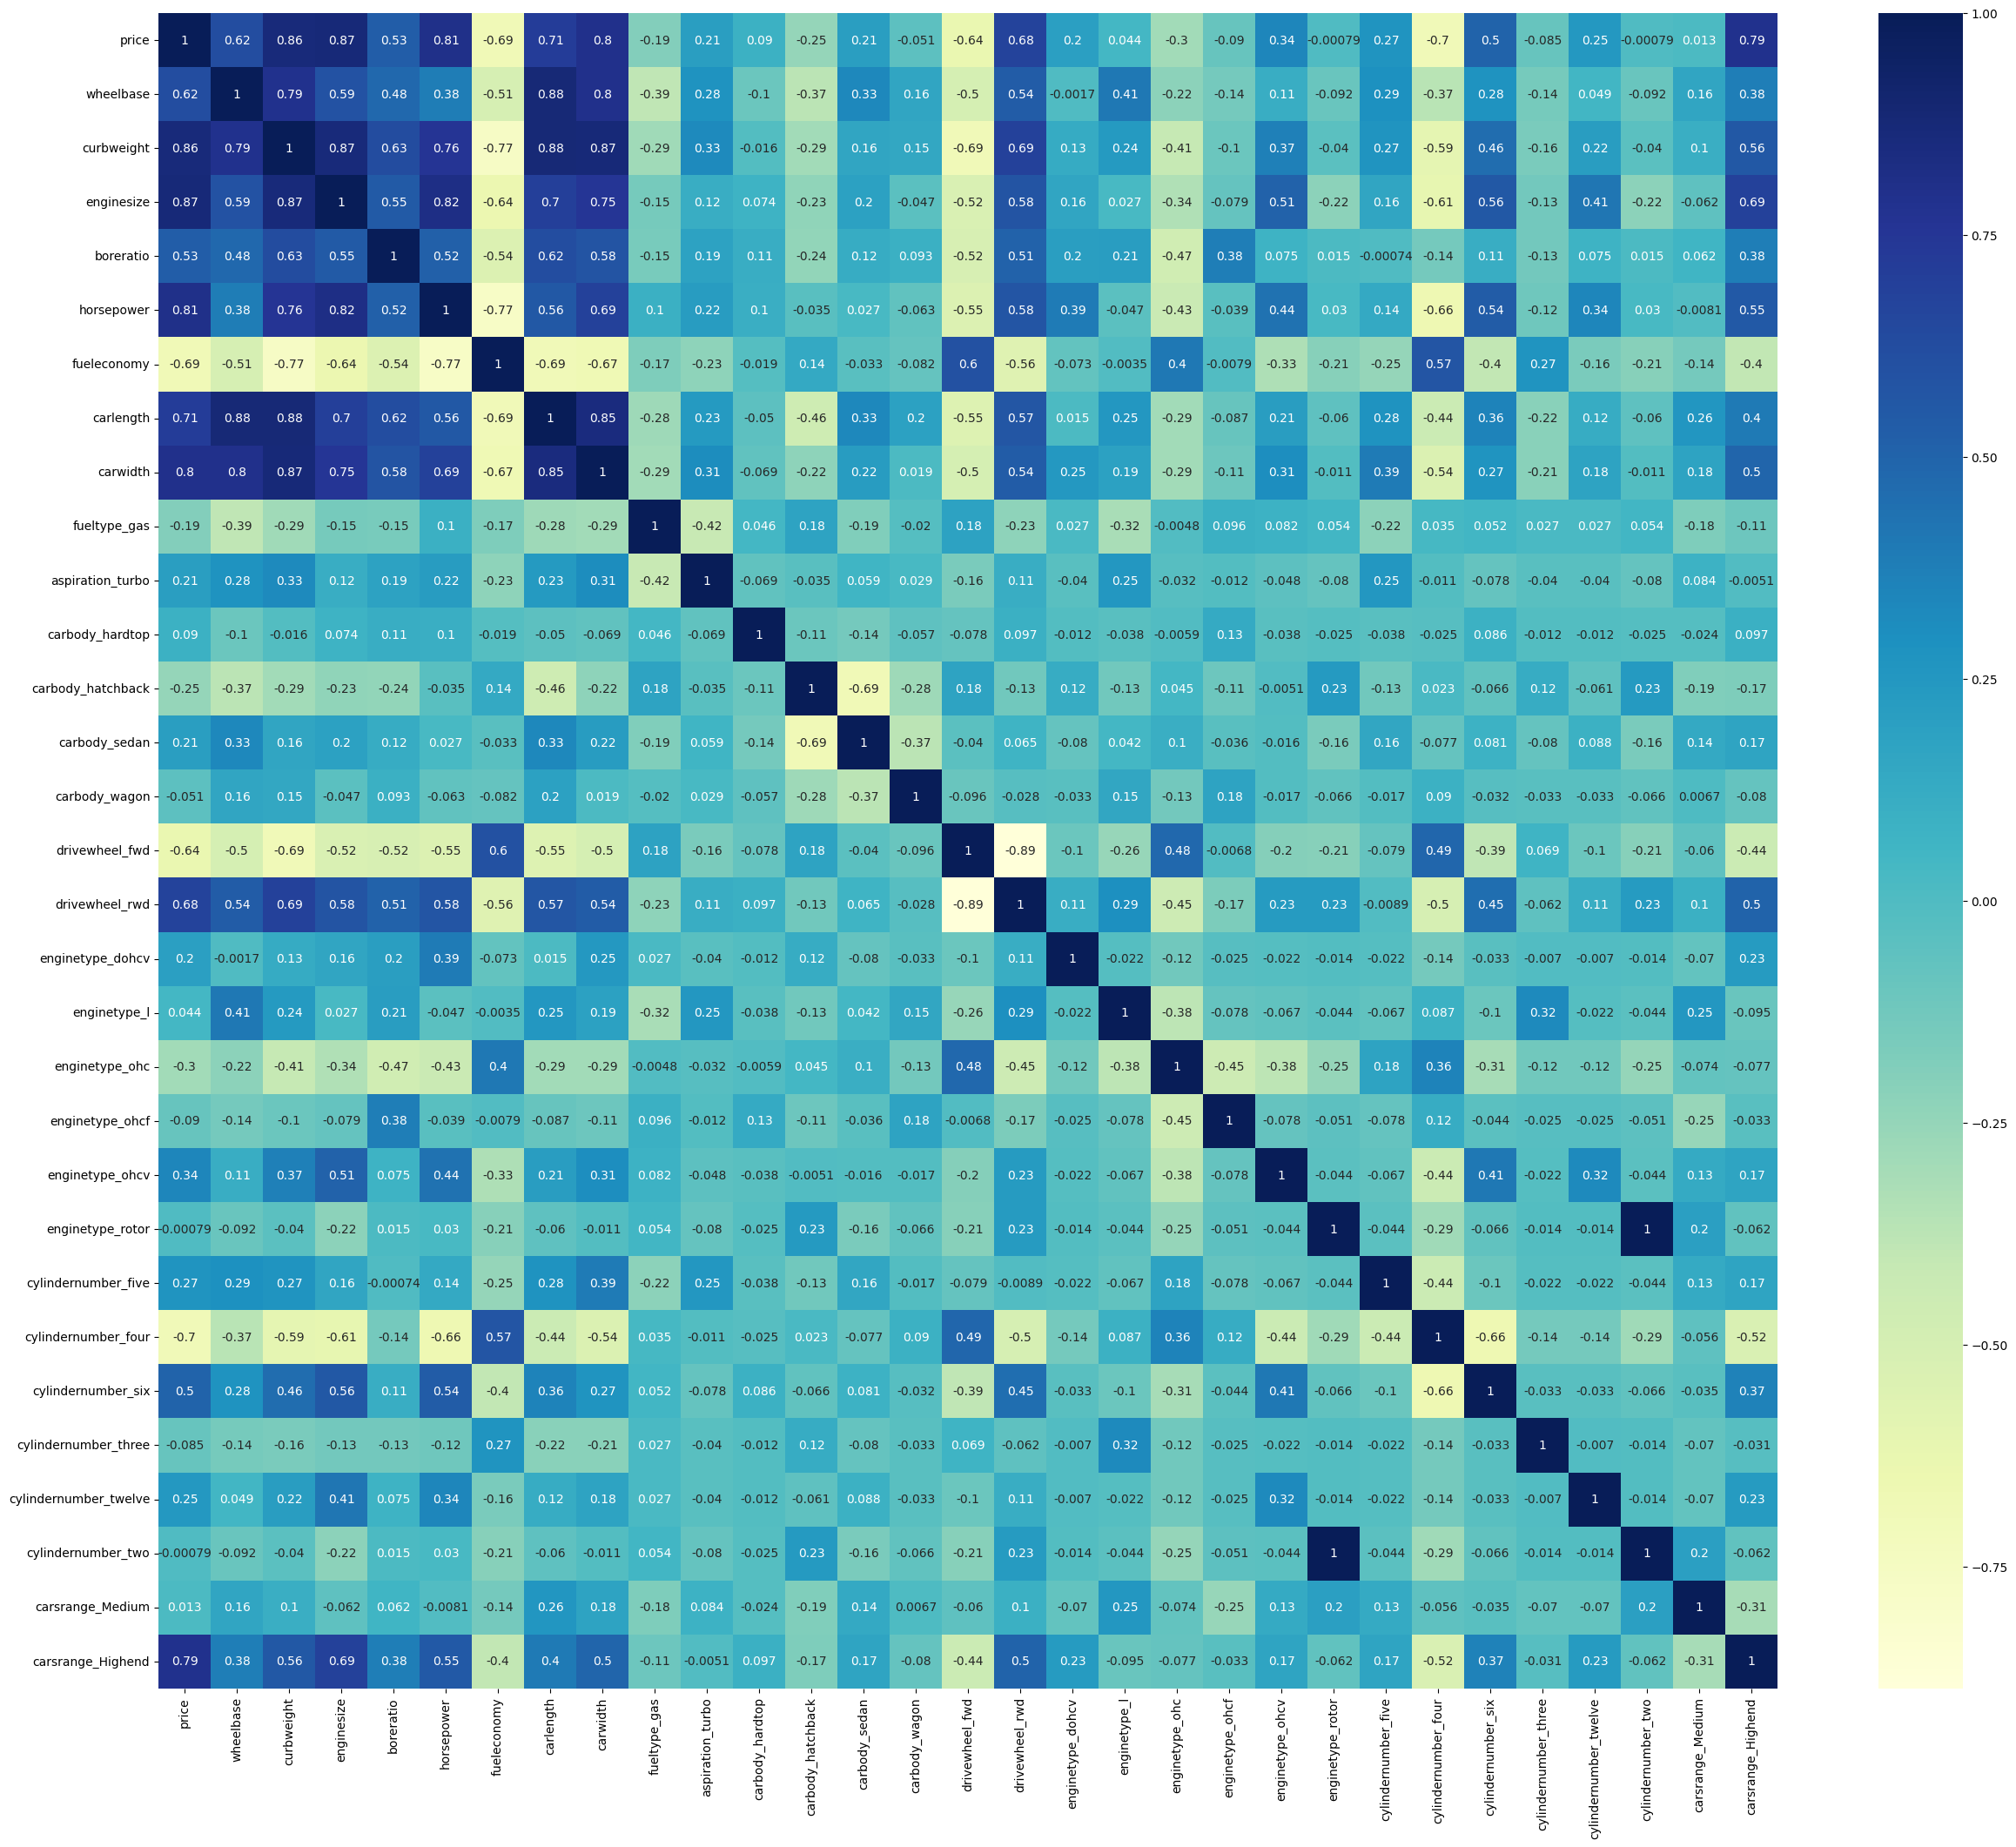

In [64]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(numeric_only=True), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.

In [65]:
df_train.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122  0.068818   0.244828    0.272692    0.139623   0.230159    0.083333   
125  0.466890   0.272414    0.500388    0.339623   1.000000    0.395833   
166  0.122110   0.272414    0.314973    0.139623   0.444444    0.266667   
1    0.314446   0.068966    0.411171    0.260377   0.626984    0.262500   
199  0.382131   0.610345    0.647401    0.260377   0.746032    0.475000   

     fueleconomy  carlength  carwidth  fueltype_gas  aspiration_turbo  \
122     0.530864   0.426016  0.291667             1                 0   
125     0.213992   0.452033  0.666667             1                 0   
166     0.344307   0.448780  0.308333             1                 0   
1       0.244170   0.450407  0.316667             1                 0   
199     0.122085   0.775610  0.575000             1                 1   

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
122                0                  0              1              0   
125                0                  1              0              0   
166                0                  1              0              0   
1                  0                  0              0              0   
199                0                  0              0              1   

     drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
122               1               0                 0             0   
125               0               1                 0             0   
166               0               1                 0             0   
1                 0               1                 0             0   
199               0               1                 0             0   

     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
122               1                0                0                 0   
125               1                0                0                 0   
166               0                0                0                 0   
1                 0                0                0                 0   
199               1                0                0                 0   

     cylindernumber_five  cylindernumber_four  cylindernumber_six  \
122                    0                    1                   0   
125                    0                    1                   0   
166                    0                    1                   0   
1                      0                    1                   0   
199                    0                    1                   0   

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
122                     0                      0                   0   
125                     0                      0                   0   
166                     0                      0                   0   
1                       0                      0                   0   
199                     0                      0                   0   

     carsrange_Medium  carsrange_Highend  
122                 0                  0  
125                 0                  1  
166                 0                  0  
1                   1                  0  
199                 1                  0

In [66]:
df_train.shape

(143, 31)

In [67]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [68]:
X_train.shape, y_train.shape

((143, 30), (143,))

### Step 8 : Model Building

In [69]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
X_train.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carsrange_Medium',
       'carsrange_Highend'],
      dtype='object')

In [71]:
len(X_train.columns)

30

In [72]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # create object of Linear Regression

In [73]:
lm.fit(X_train,y_train) # study i.e. fitting using Linear Regression

LinearRegression()

In [74]:
lm

LinearRegression()

In [75]:
# Now we call RFE
rfe = RFE(estimator= lm, n_features_to_select=10) # create an object of RFE

rfe = rfe.fit(X_train, y_train) # Fit using RFE
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [76]:
X_train.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'carsrange_Medium',
       'carsrange_Highend'],
      dtype='object')

In [77]:
rfe.support_
# True means the feature is selected
# False means the feature is not selected

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [78]:
# We can also use rfe.ranking_ to get the ranking of the features
# 1 means the feature is selected
# 2 means the feature is not selected
# 3 means the feature is not selected
rfe.ranking_

array([ 3,  1, 13, 10,  1,  1, 11,  1, 17, 18,  2,  1,  1,  1, 16, 15,  1,
       19,  7,  8,  9, 21,  6,  4,  5, 14,  1, 20, 12,  1])

In [79]:
# We can also use rfe.get_support() to get the selected features
rfe.get_support()

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [80]:
# We can also use rfe.get_feature_names_out() to get the selected features
rfe.get_feature_names_out()

array(['curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'carsrange_Highend'],
      dtype=object)

In [81]:
X_train.loc[:,rfe.support_].columns

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'carsrange_Highend'],
      dtype='object')

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', np.False_, np.int64(3)),
 ('curbweight', np.True_, np.int64(1)),
 ('enginesize', np.False_, np.int64(13)),
 ('boreratio', np.False_, np.int64(10)),
 ('horsepower', np.True_, np.int64(1)),
 ('fueleconomy', np.True_, np.int64(1)),
 ('carlength', np.False_, np.int64(11)),
 ('carwidth', np.True_, np.int64(1)),
 ('fueltype_gas', np.False_, np.int64(17)),
 ('aspiration_turbo', np.False_, np.int64(18)),
 ('carbody_hardtop', np.False_, np.int64(2)),
 ('carbody_hatchback', np.True_, np.int64(1)),
 ('carbody_sedan', np.True_, np.int64(1)),
 ('carbody_wagon', np.True_, np.int64(1)),
 ('drivewheel_fwd', np.False_, np.int64(16)),
 ('drivewheel_rwd', np.False_, np.int64(15)),
 ('enginetype_dohcv', np.True_, np.int64(1)),
 ('enginetype_l', np.False_, np.int64(19)),
 ('enginetype_ohc', np.False_, np.int64(7)),
 ('enginetype_ohcf', np.False_, np.int64(8)),
 ('enginetype_ohcv', np.False_, np.int64(9)),
 ('enginetype_rotor', np.False_, np.int64(21)),
 ('cylindernumber_five', np.False_, np.

In [83]:
len(X_train.columns[rfe.support_])

10

#### Building model using statsmodel, for the detailed statistics

In [84]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

curbweight  horsepower  fueleconomy  carwidth  carbody_hatchback  \
122    0.272692    0.083333     0.530864  0.291667                  0   
125    0.500388    0.395833     0.213992  0.666667                  1   
166    0.314973    0.266667     0.344307  0.308333                  1   
1      0.411171    0.262500     0.244170  0.316667                  0   
199    0.647401    0.475000     0.122085  0.575000                  0   

     carbody_sedan  carbody_wagon  enginetype_dohcv  cylindernumber_twelve  \
122              1              0                 0                      0   
125              0              0                 0                      0   
166              0              0                 0                      0   
1                0              0                 0                      0   
199              0              1                 0                      0   

     carsrange_Highend  
122                  0  
125                  1  
166                  0  
1                    0  
199                  0

In [85]:
X_train_rfe.shape

(143, 10)

In [86]:
import statsmodels.api as sm

In [87]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame() # empty dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [88]:
X_train_new = build_model(X_train_rfe,y_train)

# https://www.datarobot.com/blog/ordinary-least-squares-in-python/

# https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.29e-70
Time:                        09:17:31   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

p-value of `twelve` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [89]:
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

#### MODEL 2

In [90]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 25 May 2025   Prob (F-statistic):           4.25e-71
Time:                        09:17:31   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0764      0.04

In [91]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### MODEL 3

In [92]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sun, 25 May 2025   Prob (F-statistic):           7.85e-72
Time:                        09:17:31   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0305      0.02

In [93]:
# Calculating the Variance Inflation Factor
checkVIF(X_train_new)

Features    VIF
0              const  26.90
1         curbweight   8.10
5      carbody_sedan   6.07
4  carbody_hatchback   5.63
3           carwidth   5.14
2         horsepower   3.61
6      carbody_wagon   3.58
8  carsrange_Highend   1.63
7   enginetype_dohcv   1.46

dropping `curbweight` because of high VIF value. (shows that curbweight has high multicollinearity.)

In [94]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### MODEL 4


In [95]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 25 May 2025   Prob (F-statistic):           4.70e-70
Time:                        09:17:31   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0319      0.02

In [96]:
checkVIF(X_train_new)

Features    VIF
0              const  26.89
4      carbody_sedan   6.06
3  carbody_hatchback   5.54
5      carbody_wagon   3.47
1         horsepower   2.50
2           carwidth   2.22
7  carsrange_Highend   1.56
6   enginetype_dohcv   1.21

dropping `sedan` because of high VIF value.

In [97]:
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)

#### MODEL 5

In [98]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.68e-69
Time:                        09:17:31   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0934      0.01

In [99]:
checkVIF(X_train_new)

Features    VIF
0              const  10.82
1         horsepower   2.39
2           carwidth   2.09
6  carsrange_Highend   1.55
3  carbody_hatchback   1.23
5   enginetype_dohcv   1.21
4      carbody_wagon   1.11

dropping `wagon` because of high p-value.

In [100]:
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)

#### MODEL 6

In [101]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.57e-70
Time:                        09:17:31   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

In [102]:
checkVIF(X_train_new)

Features    VIF
0              const  10.39
1         horsepower   2.39
2           carwidth   2.08
5  carsrange_Highend   1.53
4   enginetype_dohcv   1.21
3  carbody_hatchback   1.13

### Step 9 : Residual Analysis of Model

In [103]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

In [104]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.57e-70
Time:                        09:17:32   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.018     -5.530      0.000      -0.132      -0.062
horsepower            0.5013      0.051      9.832      0.000       0.401       0.602
carwidth              0.3952      0.043      9.252      0.000       0.311       0.480
carbody_hatchback    -0.0336      0.012     -2.764      0.006      -0.058      -0.010
enginetype_dohcv     -0.3231      0.072     -4.502      0.000      -0.465      -0.181
carsrange_Highend     0.2833      0.021     13.615      0.000       0.242       0.324
==============================================================================
Omnibus:                       36.097   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.717
Skew:                           1.067   Prob(JB):                     8.07e-18
Kurtosis:                       5.943   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Errors')

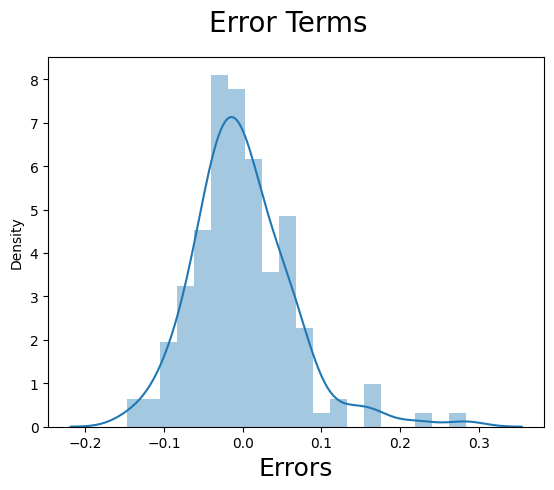

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading
plt.xlabel('Errors', fontsize = 18)

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Step 10 : Prediction and Evaluation

In [106]:
# Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio',
            'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [107]:
# Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [108]:
X_train_new.columns

Index(['const', 'horsepower', 'carwidth', 'carbody_hatchback',
       'enginetype_dohcv', 'carsrange_Highend'],
      dtype='object')

In [109]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [110]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8146387226353748

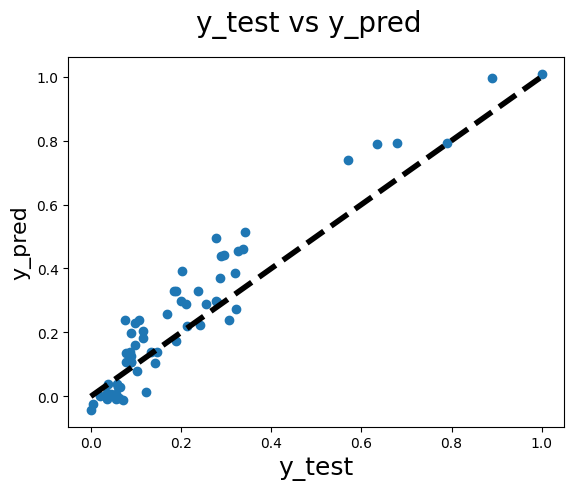

In [112]:
# EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

#### Evaluation of the model using Statistics

In [113]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.57e-70
Time:                        09:17:32   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.899 and 0.896 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

# XGBoost Regressor

In [114]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error


In [115]:
# Model Building (XGBoost Regression)
from xgboost import XGBRegressor
# Initialize the XGBoost Regressor model
# You can tune these hyperparameters for better performance
xgb_model = XGBRegressor(objective='reg:squarederror', # Corrected: Loss function for regression
                         n_estimators=100,          # Number of boosting rounds/trees
                         learning_rate=0.1,         # Step size shrinkage used in update to prevent overfitting
                         max_depth=5,               # Maximum depth of a tree
                         random_state=100)          # Seed for reproducibility



In [116]:
# Fit the model to the scaled training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=100, ...)

In [117]:
# Residual Analysis
# Predict on the training data
y_train_pred_xgb = xgb_model.predict(X_train)

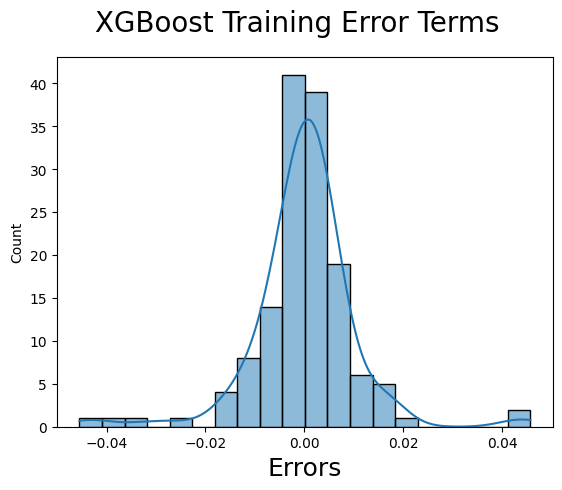

In [118]:
# Plot the histogram of the error terms for the training set
fig = plt.figure()
sns.histplot((y_train - y_train_pred_xgb), bins = 20, kde=True)
fig.suptitle('XGBoost Training Error Terms', fontsize = 20)  # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [119]:
#  Prediction and Evaluation
# Predict on the scaled test data
y_test_pred_xgb = xgb_model.predict(X_test)

In [120]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error

r2_xgb_test = r2_score(y_test, y_test_pred_xgb)
# Calculate MSE and then take the square root to get RMSE
mse_xgb_test = mean_squared_error(y_test, y_test_pred_xgb)
rmse_xgb_test = np.sqrt(mse_xgb_test) # Calculate RMSE by taking the square root of MSE

print(f"XGBoost Test R-squared: {r2_xgb_test}")
print(f"XGBoost Test RMSE: {rmse_xgb_test}")


XGBoost Test R-squared: 0.9152708111786401
XGBoost Test RMSE: 0.060895463048612666


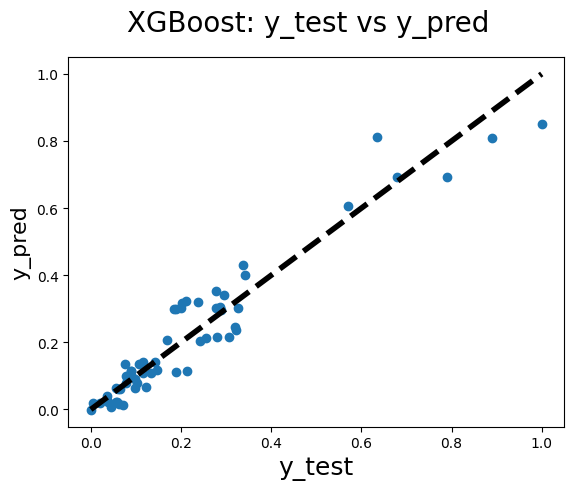

In [121]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred_xgb)
fig.suptitle('XGBoost: y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Grid Search Hypertuning on XGBoost Model

Starting Grid Search...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Grid Search finished.
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best R-squared from cross-validation: 0.8961097728609093
Tuned XGBoost Test R-squared: 0.8977361891364546
Tuned XGBoost Test RMSE: 0.06690050548986833


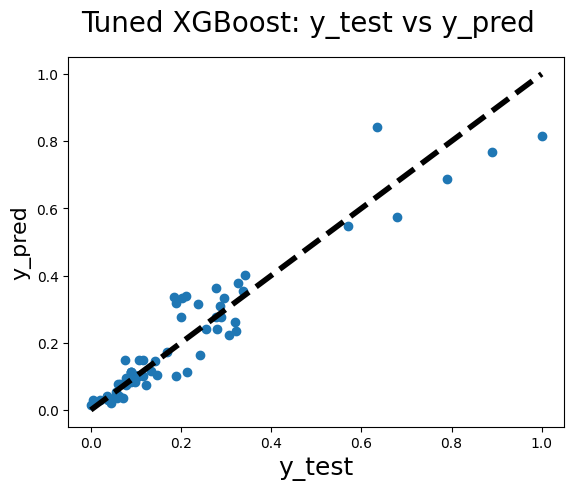

In [122]:
# Ensure necessary libraries are imported
from sklearn.model_selection import GridSearchCV

#  Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage
    'max_depth': [3, 5, 7],               # Maximum depth of a tree
    'subsample': [0.7, 0.8, 0.9],         # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9]   # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBoost Regressor model
# Use a placeholder for the parameters that will be tuned
xgb_model_tune = XGBRegressor(objective='reg:squarederror',
                              random_state=100)

# Initialize GridSearchCV
# cv: number of cross-validation folds
# scoring: metric to evaluate models (e.g., 'r2' for R-squared)
# n_jobs: number of cores to use (-1 means use all available cores)
grid_search = GridSearchCV(estimator=xgb_model_tune,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2', # or 'neg_mean_squared_error' for RMSE
                           n_jobs=-1,
                           verbose=1) # Set verbose to 1 or higher to see progress

# Fit GridSearchCV to the training data
# This will perform the grid search with cross-validation
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search finished.")

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best R-squared from cross-validation: {best_score}")

# Train the final model with the best parameters
final_xgb_model = XGBRegressor(objective='reg:squarederror', # Corrected the typo here
                               **best_params, # Use the best parameters found
                               random_state=100)

final_xgb_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_test_pred_tuned_xgb = final_xgb_model.predict(X_test)

r2_xgb_tuned_test = r2_score(y_test, y_test_pred_tuned_xgb)
# Calculate MSE
mse_xgb_tuned_test = mean_squared_error(y_test, y_test_pred_tuned_xgb)
# Calculate RMSE by taking the square root of MSE
rmse_xgb_tuned_test = np.sqrt(mse_xgb_tuned_test)

print(f"Tuned XGBoost Test R-squared: {r2_xgb_tuned_test}")
print(f"Tuned XGBoost Test RMSE: {rmse_xgb_tuned_test}")

# Visualize the predictions vs actual values for the tuned model
fig = plt.figure()
plt.scatter(y_test, y_test_pred_tuned_xgb)
fig.suptitle('Tuned XGBoost: y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

Model Comparison and Best Model Selection
You have trained two models for car price prediction:

Linear Regression Model: Trained using statsmodels.api.OLS.
XGBoost Regressor Model: Both an initial model and a hyperparameter-tuned version using GridSearchCV.
Let's compare their performance based on the R-squared score, which measures the proportion of the variance in the dependent variable (price) that is predictable from the independent variables. A higher R-squared indicates a better fit. You also calculated RMSE for the XGBoost models, which is the square root of the average squared errors, giving an idea of the typical error size in the same units as the target variable. Lower RMSE is better.

Here are the performance metrics you obtained:

Linear Regression (on Training Data with selected features):

R-squared: 0.899
Adjusted R-squared: 0.896
Prob (F-statistic): 1.04e-67 (very low, indicating the model is statistically significant)
Initial XGBoost Regressor (on Test Data):

Test R-squared: 0.8958158959367803
Test RMSE: 0.053295473774370984
Tuned XGBoost Regressor (on Test Data):

Test R-squared: 0.8977361891364546
Test RMSE: 0.05282960381599674
Analysis:

Training vs. Test Performance:

The Linear Regression R-squared is reported on the training data subset (X_train_new, which is X_train after feature selection and dropping the constant). While 0.899 is good, it doesn't directly tell us how well it generalizes to unseen data.
The XGBoost models are evaluated on the test data (X_test), which is crucial for assessing generalization performance. Both initial and tuned XGBoost models show R-squared values very close to the Linear Regression's training R-squared.
Comparing Initial and Tuned XGBoost:

The tuned XGBoost model has a slightly higher R-squared (0.8977) than the initial XGBoost model (0.8958) on the test set.
The tuned XGBoost model also has a slightly lower RMSE (0.0528) than the initial XGBoost model (0.0533) on the test set.
Conclusion:

Based solely on the R-squared and RMSE metrics on the test set, the Tuned XGBoost Regressor appears to be the best model among the ones you have evaluated for predicting car prices. It shows the highest R-squared and the lowest RMSE on the data it hasn't seen during training.

While the Linear Regression model performed well on the training data (0.899 R-squared), its performance on the test set is not explicitly reported in your output. Comparing the R-squared of the Linear Regression model on the test set would provide a more direct comparison with the XGBoost models. However, given the slightly improved performance of the tuned XGBoost on the test set compared to the initial XGBoost, it is the preferred model based on the provided results.



# The Tuned XGBoost Regressor is the recommended model based on your analysis. It exhibits slightly better generalization performance on the test data as indicated by a higher R-squared and lower RMSE compared to the initial XGBoost model.

# Save The Model File

In [123]:
import joblib
import os

# Define the directory and filenames
model_dir = 'saved_models'
model_filename = os.path.join(model_dir, 'tuned_xgb_regressor_model.pkl')
scaler_filename = os.path.join(model_dir, 'scaler.pkl')

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the trained model and the fitted scaler
joblib.dump(final_xgb_model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"Model saved to {model_filename}")
print(f"Scaler saved to {scaler_filename}")

Model saved to saved_models/tuned_xgb_regressor_model.pkl
Scaler saved to saved_models/scaler.pkl
